#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import re
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

# Suppress warnings for cleaner output (optional)
warnings.filterwarnings('ignore')

df= pd.read_csv('cars_for_sale(uncleaned).csv')



#EDA

##Inspect data

In [ ]:
print("Cars for Sales Dataset Shape:", df.shape)
display(df.head())
display(df.tail())
df.info()

Cars for Sales Dataset Shape: (9246, 10)


,Car,Condition,Mileage,Price,Basics Info,Vehicle History Info,Vehicle Reviews Info,Seller Rating,Seller Rating Count,Seller Address
0,2024 Lexus LC 500 Base,New,0 mi.,"$112,865MSRP $118,865","{'Exterior color': ' Caviar ', 'Interior color...",{},{},4.7,"(1,261 reviews)","1250 W Division St Chicago, IL 60642"
1,2007 Acura TSX Base,Used,"61,110 mi.","$11,295",{'Exterior color': ' Alabaster Silver Metallic...,{'Accidents or damage': 'At least 1 accident o...,{},4.2,(440 reviews),"1301 N Elston Ave Chicago, IL 60642"
2,2016 McLaren 675LT Base,Used,"6,305 mi.","$219,997$5,464 price drop","{'Exterior color': ' McLaren Orange ', 'Interi...",{'Accidents or damage': 'At least 1 accident o...,"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",3.1,(421 reviews),"1561 N Fremont St Chicago, IL 60642"
3,2016 Audi TTS 2.0T quattro,Used,"65,715 mi.","$23,999","{'Exterior color': ' Black ', 'Interior color'...",{'Accidents or damage': 'At least 1 accident o...,"{'Comfort': '3.0', 'Interior': '5.0', 'Perform...",3.6,(123 reviews),"560 E North Ave West Chicago, IL 60185"
4,2018 BMW 740e xDrive iPerformance,Used,"19,830 mi.","$39,799$100 price drop","{'Exterior color': ' Imperial Blue Metallic ',...","{'Accidents or damage': 'None reported', 'Clea...","{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.4,(91 reviews),"6539 Ogden Ave Berwyn, IL 60402"


,Car,Condition,Mileage,Price,Basics Info,Vehicle History Info,Vehicle Reviews Info,Seller Rating,Seller Rating Count,Seller Address
9241,NaN,NaN,NaN,NaN,{},{},{},NaN,NaN,NaN
9242,2022 BMW X3 xDrive30i,Used,"48,804 mi.","$27,979$998 price drop","{'Exterior color': ' Dark Graphite Metallic ',...","{'Accidents or damage': 'None reported', '1-ow...",{},4.8,"(3,739 reviews)","1313 Rand Road Des Plaines, IL 60016"
9243,2024 GMC Sierra 1500 Pro,New,3 mi.,"$51,080MSRP $51,080","{'Exterior color': ' Summit White ', 'Interior...",{},"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.5,"(3,896 reviews)","8425 159th St Tinley Park, IL 60487"
9244,2012 GMC Terrain SLT-1,Used,"146,694 mi.","$8,995","{'Exterior color': ' Black ', 'Interior color'...",{'Accidents or damage': 'At least 1 accident o...,{},NaN,NaN,"13840 South Pulaski Road Crestwood, IL 60445"
9245,2024 Subaru Outback Touring XT,New,4 mi.,"$42,014",{'Exterior color': ' Magnetite Gray Metallic '...,{},"{'Comfort': '4.0', 'Interior': '4.0', 'Perform...",NaN,NaN,"1350 Park Ave W Highland Park, IL 60035"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9246 entries, 0 to 9245
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   9071 non-null   object 
 1   Condition             9071 non-null   object 
 2   Mileage               9071 non-null   object 
 3   Price                 9071 non-null   object 
 4   Basics Info           9242 non-null   object 
 5   Vehicle History Info  9242 non-null   object 
 6   Vehicle Reviews Info  9242 non-null   object 
 7   Seller Rating         7716 non-null   float64
 8   Seller Rating Count   7716 non-null   object 
 9   Seller Address        8954 non-null   object 
dtypes: float64(1), object(9)
memory usage: 722.5+ KB


##Checking Null values

In [ ]:
missing_summary = pd.DataFrame({
    'null_count': df.isnull().sum(),
    'null_pct': (df.isnull().sum() / len(df)) * 100
})
missing_summary

,null_count,null_pct
Car,175,1.892710
Condition,175,1.892710
Mileage,175,1.892710
Price,175,1.892710
Basics Info,4,0.043262
Vehicle History Info,4,0.043262
Vehicle Reviews Info,4,0.043262
Seller Rating,1530,16.547696
Seller Rating Count,1530,16.547696
Seller Address,292,3.158122


##Cheking Duplicate

In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 2531


##Summary statistics for all columns

In [ ]:
print(df.describe(include='all'))

                                       Car Condition Mileage    Price  \
count                                 9071      9071    9071     9071   
unique                                3449        31    3978     5167   
top     2024 Jeep Grand Cherokee L Limited      Used   5 mi.  $9,995    
freq                                   122      5005     495       34   
mean                                   NaN       NaN     NaN      NaN   
std                                    NaN       NaN     NaN      NaN   
min                                    NaN       NaN     NaN      NaN   
25%                                    NaN       NaN     NaN      NaN   
50%                                    NaN       NaN     NaN      NaN   
75%                                    NaN       NaN     NaN      NaN   
max                                    NaN       NaN     NaN      NaN   

       Basics Info Vehicle History Info Vehicle Reviews Info  Seller Rating  \
count         9242                 9242     

### Plot boxplots for all numeric columns

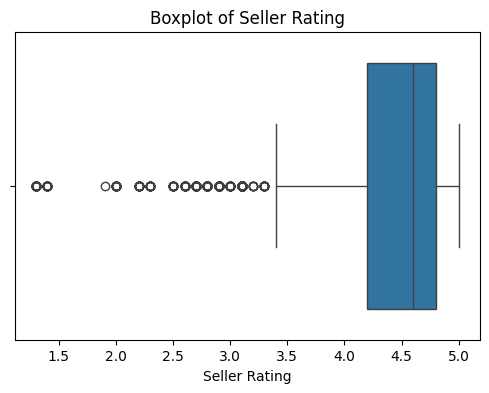

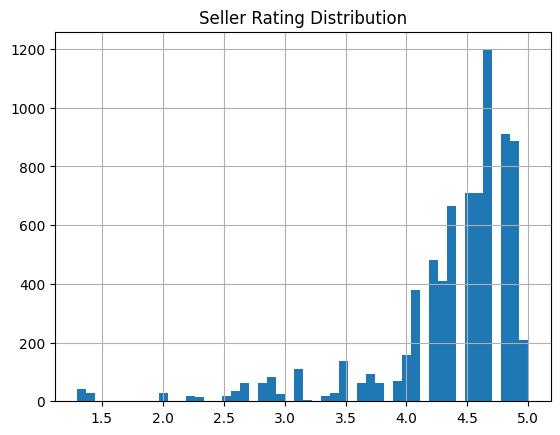

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

df['Seller Rating'].hist(bins=50)
plt.title("Seller Rating Distribution")
plt.show()

#feature engineering

In [ ]:
# Clean Price
if 'Price' in df.columns:
    df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df['Price'] = df['Price'].str.extract(r'(\d+)').astype(float)


# Clean Mileage
if 'Mileage' in df.columns:
    df['Mileage'] = df['Mileage'].astype(str).str.replace(' mi.', '', regex=False).str.replace(',', '', regex=False).str.strip()
    df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')


# Clean Seller Rating Count
if 'Seller Rating Count' in df.columns:
    df["Seller Rating Count"] = df["Seller Rating Count"].astype(str)
    df["Seller Rating Count"] = df["Seller Rating Count"].str.replace("reviews", "", regex=False)
    df["Seller Rating Count"] = df["Seller Rating Count"].str.replace(",",'', regex=False)
    df["Seller Rating Count"] = df["Seller Rating Count"].str.strip("()").str.strip()
    df["Seller Rating Count"] = pd.to_numeric(df["Seller Rating Count"], errors='coerce')

#  Split Car into Year, Make, and Model
if 'Car' in df.columns:
    df[['Year', 'Make_Model_Combined']] = df['Car'].str.split(n=1, expand=True)
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

    # Split 'Make_Model_Combined' into 'Make' and 'Model'
    make_model_split = df['Make_Model_Combined'].str.split(n=1, expand=True)
    df['Make'] = make_model_split[0]
    df['Model'] = make_model_split[1].fillna('') # Handle cases where there's no model part


#  Extract from Basics Info (assuming it's a string with key-value pairs)
if 'Basics Info' in df.columns:
    # Interior color
    df['Interior Color'] = df['Basics Info'].str.extract(r"'Interior color':\s*'([^']*)'", expand=False).str.strip().fillna('')

    # Drivetrain
    df['Drivetrain'] = df['Basics Info'].str.extract(r"'Drivetrain':\s*'([^']*)'", expand=False).str.strip().fillna('')

    # Fuel type
    df['Fuel Type'] = df['Basics Info'].str.extract(r"'Fuel type':\s*'([^']*)'", expand=False).str.strip().fillna('')

    # Engine Size
    engine_str = df['Basics Info'].str.extract(r"'Engine':\s*'([^']*)'", expand=False)
    df['Engine Size (L)'] = engine_str.str.extract(r'(\d+\.?\d*)\s?L', expand=False).astype(float)

    # MPG (Min and Max)
    mpg_str = df['Basics Info'].str.extract(r"'MPG':\s*'([^']*)'", expand=False)
    mpg_parts = mpg_str.str.extract(r'(\d+)\D*(\d+)', expand=True)
    df['Min MPG'] = pd.to_numeric(mpg_parts.iloc[:, 0], errors='coerce')
    df['Max MPG'] = pd.to_numeric(mpg_parts.iloc[:, 1], errors='coerce')


#  Extract from Vehicle History Info
if 'Vehicle History Info' in df.columns:
    # Helper function for yes/no mappings (your original, with minor tweaks)
    def map_history_value(df_col, key, true_map, false_map):
        raw_value = df_col.str.extract(rf"'{key}':\s*'([^']*)'", expand=False).fillna('')
        conditions = [raw_value.str.contains(true_map, na=False)]
        choices = ['True']
        return np.select(conditions, choices, default='False').astype('object')

    df['1-Owner Vehicle'] = map_history_value(df['Vehicle History Info'], '1-owner vehicle', 'Yes', 'No')
    df['Personal Use Only'] = map_history_value(df['Vehicle History Info'], 'Personal use only', 'Yes', 'No')
    df['Clean Title'] = map_history_value(df['Vehicle History Info'], 'Clean title', 'Yes', 'No')

    # Accidents or damage (as binary: 1 if accident mentioned, else NaN)
    acc_value = df['Vehicle History Info'].str.extract(r"'Accidents or damage':\s*'([^']*)'", expand=False).fillna('')
    df['Accidents or Damage'] = np.where(acc_value.str.contains('accident', na=False), 1.0, np.nan)

    # Open recall (as binary: 1 if recall reported, else 0)
    recall_value = df['Vehicle History Info'].str.extract(r"'Open recall':\s*'([^']*)'", expand=False).fillna('')
    df['Open Recall'] = np.where(recall_value.str.contains('recall reported', na=False), 1, 0)


#  Extract scores from Vehicle Reviews Info
if 'Vehicle Reviews Info' in df.columns:
    for score_name in ['Comfort', 'Interior', 'Performance', 'Value', 'Exterior', 'Reliability']:
        df[f'{score_name}_score'] = df['Vehicle Reviews Info'].str.extract(rf"'{score_name}':\s*'(\d+\.?\d*)'", expand=False).astype(float)

# Remove duplicates and handle outliers
df.drop_duplicates(inplace=True)


#EDA

## Initial checks

In [ ]:
print("Original shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())

Original shape: (6715, 31)
Columns: ['Car', 'Condition', 'Mileage', 'Price', 'Basics Info', 'Vehicle History Info', 'Vehicle Reviews Info', 'Seller Rating', 'Seller Rating Count', 'Seller Address', 'Year', 'Make_Model_Combined', 'Make', 'Model', 'Interior Color', 'Drivetrain', 'Fuel Type', 'Engine Size (L)', 'Min MPG', 'Max MPG', '1-Owner Vehicle', 'Personal Use Only', 'Clean Title', 'Accidents or Damage', 'Open Recall', 'Comfort_score', 'Interior_score', 'Performance_score', 'Value_score', 'Exterior_score', 'Reliability_score']
Data types:
 Car                      object
Condition                object
Mileage                 float64
Price                   float64
Basics Info              object
Vehicle History Info     object
Vehicle Reviews Info     object
Seller Rating           float64
Seller Rating Count     float64
Seller Address           object
Year                      Int64
Make_Model_Combined      object
Make                     object
Model                    object
Inte

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6715 entries, 0 to 9243
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   6713 non-null   object 
 1   Condition             6713 non-null   object 
 2   Mileage               6603 non-null   float64
 3   Price                 6701 non-null   float64
 4   Basics Info           6714 non-null   object 
 5   Vehicle History Info  6714 non-null   object 
 6   Vehicle Reviews Info  6714 non-null   object 
 7   Seller Rating         5762 non-null   float64
 8   Seller Rating Count   5762 non-null   float64
 9   Seller Address        6637 non-null   object 
 10  Year                  6713 non-null   Int64  
 11  Make_Model_Combined   6713 non-null   object 
 12  Make                  6713 non-null   object 
 13  Model                 6715 non-null   object 
 14  Interior Color        6715 non-null   object 
 15  Drivetrain            6715

In [ ]:
(df.isnull().sum()/len(df))*100

,0
Car,0.029784
Condition,0.029784
Mileage,1.667908
Price,0.208488
Basics Info,0.014892
Vehicle History Info,0.014892
Vehicle Reviews Info,0.014892
Seller Rating,14.192107
Seller Rating Count,14.192107
Seller Address,1.161579


In [ ]:
df.describe()

,Mileage,Price,Seller Rating,Seller Rating Count,Year,Engine Size (L),Min MPG,Max MPG,Accidents or Damage,Open Recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
count,6603.000000,6.701000e+03,5762.000000,5762.000000,6713.0,6235.000000,5494.000000,5494.000000,1275.0,6715.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3236.000000
mean,34688.426018,8.940193e+07,4.395297,1505.491496,2019.732608,2.957851,20.896068,26.691300,1.0,0.068503,4.599452,4.568992,4.545842,4.415169,4.733475,4.486094
std,43416.698074,1.142564e+09,0.600194,1674.128277,6.222233,1.329333,7.170997,8.469868,0.0,0.252626,0.840091,0.817825,0.865383,1.017687,0.692475,1.045839
min,0.000000,1.997000e+03,1.300000,5.000000,1959.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,10.000000,2.667600e+04,4.200000,258.000000,2018.0,2.000000,18.000000,24.000000,1.0,0.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
50%,17246.000000,4.398000e+04,4.600000,1041.000000,2022.0,2.500000,21.000000,28.000000,1.0,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,59730.500000,1.180000e+05,4.800000,2054.000000,2024.0,3.600000,25.000000,32.000000,1.0,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,324349.000000,4.799951e+10,5.000000,11663.000000,2025.0,8.400000,150.000000,122.000000,1.0,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


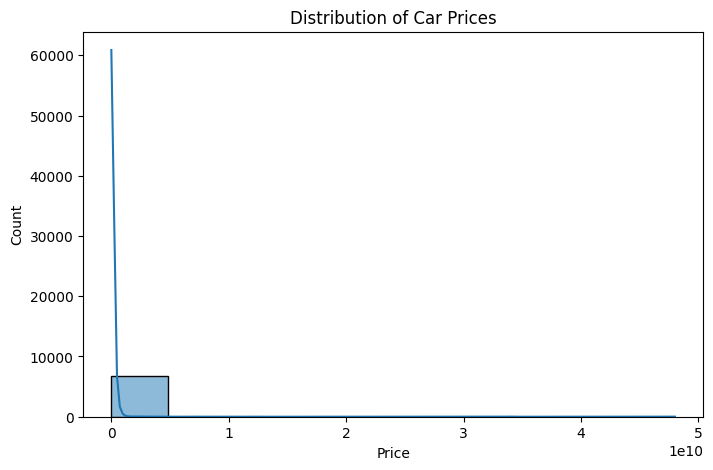

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=10, kde=True)
plt.title('Distribution of Car Prices')
plt.show()

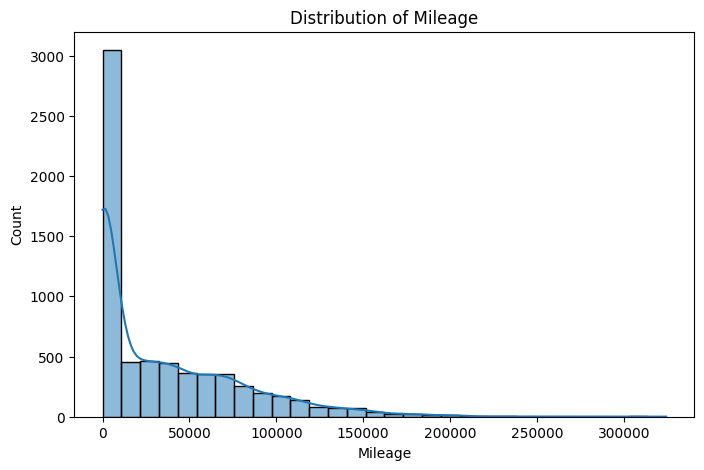

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Mileage'], bins=30, kde=True)
plt.title('Distribution of Mileage')
plt.show()

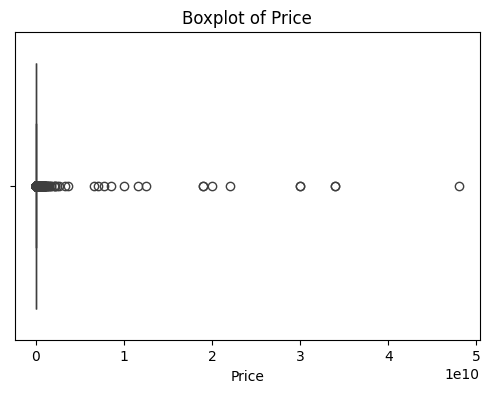

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

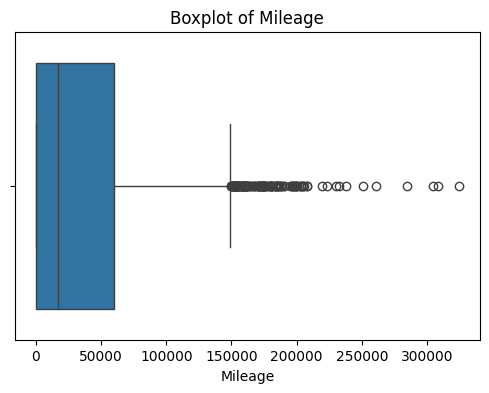

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Mileage'])
plt.title('Boxplot of Mileage')
plt.show()

#Outliers Handling

In [ ]:
for col in ['Price']:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Outliers removed for {col}. New shape:", df.shape)

Outliers removed for Price. New shape: (5115, 31)


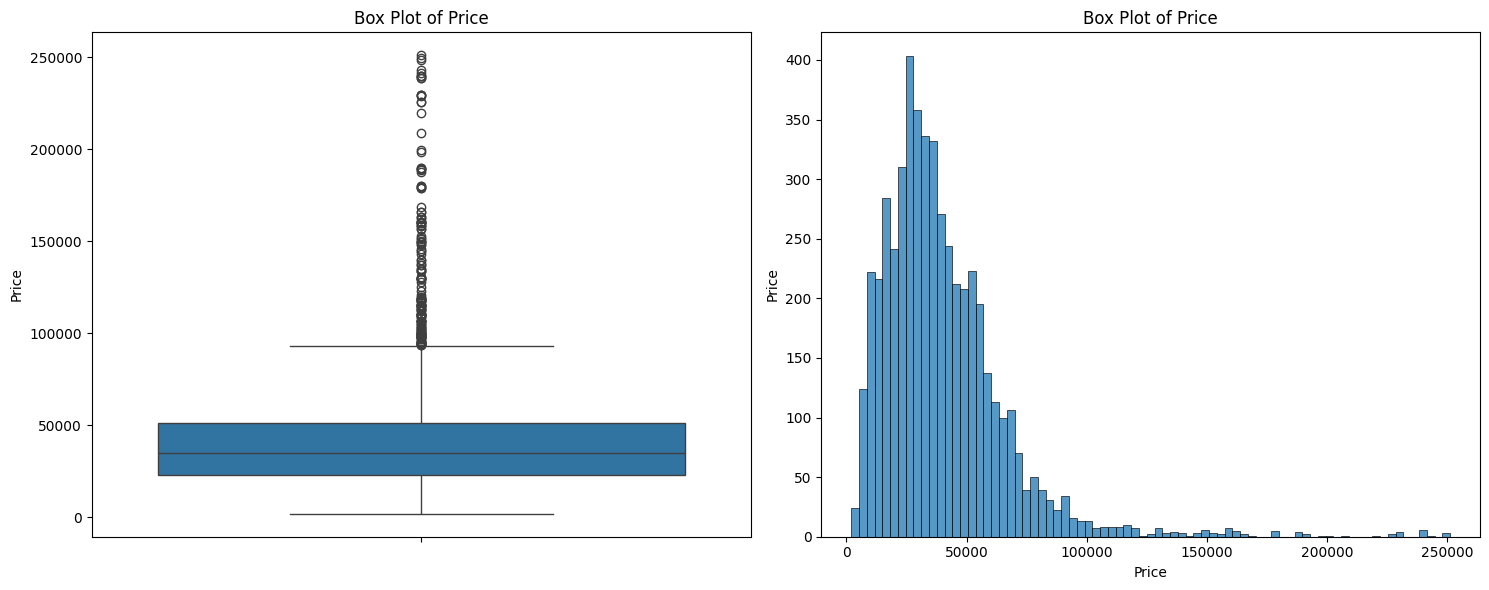

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Price
sns.boxplot(ax=axes[0], y=df['Price'])
axes[0].set_title('Box Plot of Price')
axes[0].set_ylabel('Price')

# Histogram for Price
sns.histplot(ax=axes[1], x=df['Price'])
axes[1].set_title('Box Plot of Price')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize Mileage
df['Mileage'] = winsorize(df['Mileage'], limits=[0.05, 0.05]).data

print("Outliers handled for Price and Mileage. New shape:", df.shape)


Outliers handled for Price and Mileage. New shape: (5115, 31)


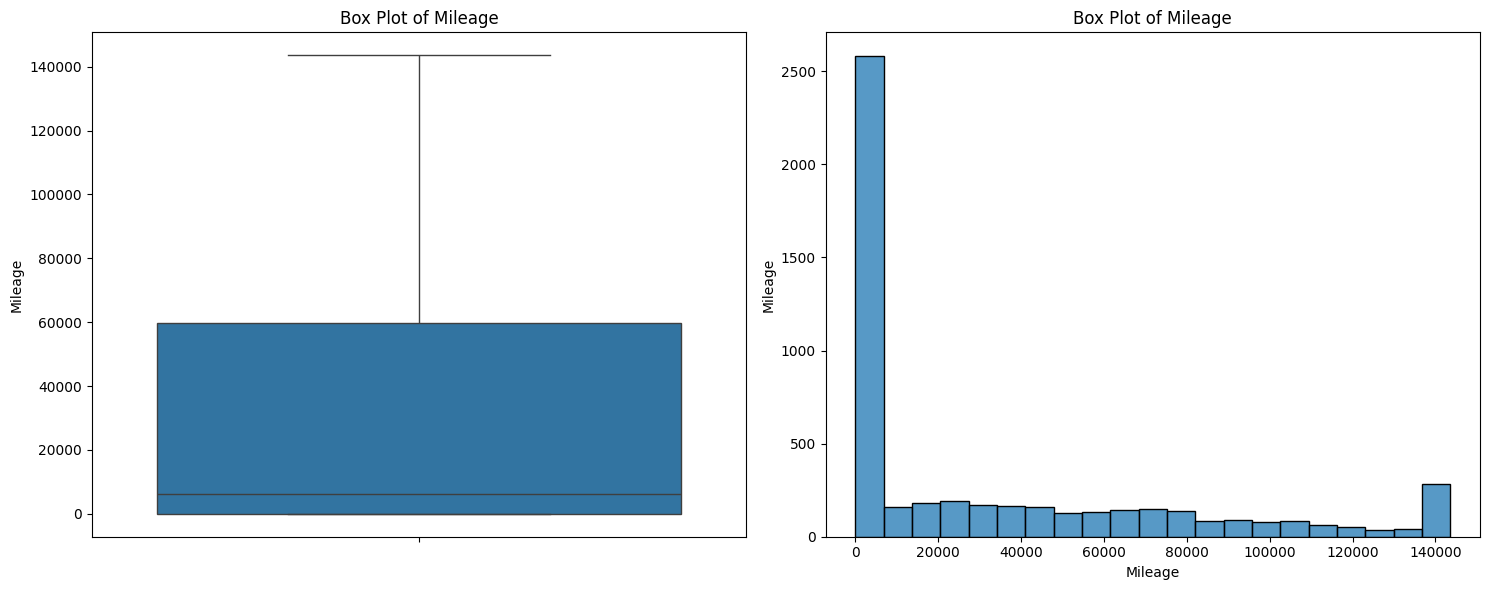

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Mileage
sns.boxplot(ax=axes[0], y=df['Mileage'])
axes[0].set_title('Box Plot of Mileage')
axes[0].set_ylabel('Mileage')

# Histogram for Mileage
sns.histplot(ax=axes[1], x=df['Mileage'])
axes[1].set_title('Box Plot of Mileage')
axes[1].set_ylabel('Mileage')

plt.tight_layout()
plt.show()

# Final validation

In [ ]:
print("Final shape:", df.shape)
print("Final missing values:\n", df.isnull().sum())
print("Final data types:\n", df.dtypes)
print("Sample cleaned data:\n", df.head())

Final shape: (5115, 31)
Final missing values:
 Car                        0
Condition                  0
Mileage                    0
Price                      0
Basics Info                0
Vehicle History Info       0
Vehicle Reviews Info       0
Seller Rating            749
Seller Rating Count      749
Seller Address            76
Year                       0
Make_Model_Combined        0
Make                       0
Model                      0
Interior Color             0
Drivetrain                 0
Fuel Type                  0
Engine Size (L)          351
Min MPG                 1026
Max MPG                 1026
1-Owner Vehicle            0
Personal Use Only          0
Clean Title                0
Accidents or Damage     4264
Open Recall                0
Comfort_score           2543
Interior_score          2543
Performance_score       2543
Value_score             2543
Exterior_score          2543
Reliability_score       2578
dtype: int64
Final data types:
 Car                   

#Remove uncleaned columns & export dataset

In [ ]:
columns_to_drop = ['Car', 'Make_Model_Combined', 'Basics Info', 'Vehicle History Info','Vehicle Reviews Info', 'Seller Address']  # List of original messy columns
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
print("Uncleaned columns removed. Remaining columns:", df.columns.tolist())
print("Final shape after column removal:", df.shape)

# Export cleaned dataset
df.to_csv('cleaned_usa_car_market.csv', index=False)
print("Cleaned data exported to 'cleaned_usa_car_market.csv'")

Uncleaned columns removed. Remaining columns: ['Condition', 'Mileage', 'Price', 'Seller Rating', 'Seller Rating Count', 'Year', 'Make', 'Model', 'Interior Color', 'Drivetrain', 'Fuel Type', 'Engine Size (L)', 'Min MPG', 'Max MPG', '1-Owner Vehicle', 'Personal Use Only', 'Clean Title', 'Accidents or Damage', 'Open Recall', 'Comfort_score', 'Interior_score', 'Performance_score', 'Value_score', 'Exterior_score', 'Reliability_score']
Final shape after column removal: (5115, 25)
Cleaned data exported to 'cleaned_usa_car_market.csv'


#Clean Data view

In [ ]:
df_cleaned= pd.read_csv('cleaned_usa_car_market.csv')

In [ ]:
df_cleaned= pd.read_csv('cleaned_usa_car_market.csv')

# Get all current columns
current_columns = df_cleaned.columns.tolist()

# Define the columns to move to the beginning
leading_columns = ['Year', 'Make', 'Model']

# Remove leading_columns from current_columns to avoid duplicates
remaining_columns = [col for col in current_columns if col not in leading_columns]

# Create the new ordered list of columns
new_column_order = leading_columns + remaining_columns

# Reindex the DataFrame with the new column order
df_cleaned = df_cleaned[new_column_order]

# Display the first 5 rows with the new column order
display(df_cleaned.head())

,Year,Make,Model,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior Color,Drivetrain,...,Personal Use Only,Clean Title,Accidents or Damage,Open Recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,2024,Lexus,LC 500 Base,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,...,False,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Acura,TSX Base,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,...,True,False,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Audi,TTS 2.0T quattro,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,...,True,True,1.0,0,3.0,5.0,5.0,5.0,5.0,5.0
3,2012,Nissan,NV Cargo S,Used,110202.0,14985.0,3.6,64.0,Gray,Rear-wheel Drive,...,False,True,1.0,0,5.0,5.0,5.0,4.0,4.0,3.0
4,2008,Chrysler,Sebring Touring,Used,77893.0,7995.0,3.5,43.0,Gray,Front-wheel Drive,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Columns:", df_cleaned.isnull().sum())

Columns: Year                      0
Make                      0
Model                     0
Condition                 0
Mileage                   0
Price                     0
Seller Rating           749
Seller Rating Count     749
Interior Color            0
Drivetrain                0
Fuel Type               325
Engine Size (L)         351
Min MPG                1026
Max MPG                1026
1-Owner Vehicle           0
Personal Use Only         0
Clean Title               0
Accidents or Damage    4264
Open Recall               0
Comfort_score          2543
Interior_score         2543
Performance_score      2543
Value_score            2543
Exterior_score         2543
Reliability_score      2578
dtype: int64


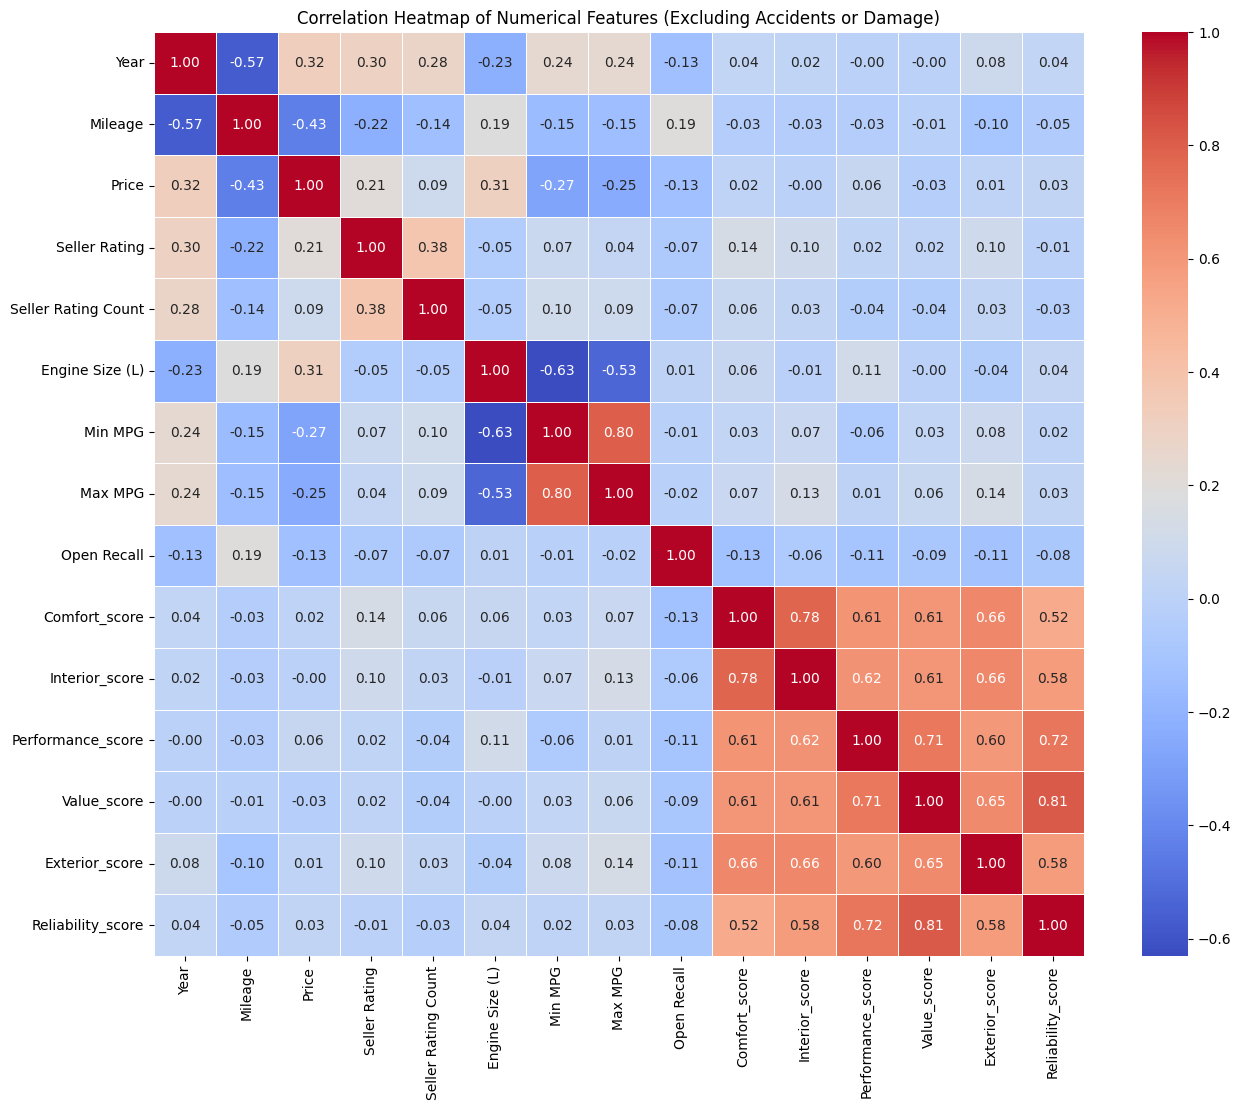

In [ ]:
numeric_df = df_cleaned.select_dtypes(include=np.number)

if 'Accidents or Damage' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Accidents or Damage'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Excluding Accidents or Damage)')
plt.show()

#Imputaion

In [ ]:
df_cleaned["Seller Rating"] = pd.to_numeric(df_cleaned["Seller Rating"], errors="coerce")



median_rating = df_cleaned["Seller Rating"].median()
df_cleaned["Seller Rating"].fillna(median_rating, inplace=True)

print("Seller Rating imputation completed!\n")
print(df_cleaned["Seller Rating"].value_counts().head())

def clean_rating_count(x):
    if pd.isna(x):
        return np.nan

    x = str(x)
    match = re.search(r"([\d,]+)", x)
    if match:
        return int(match.group(1).replace(",", ""))

    return np.nan

    df_cleaned["Seller Rating Count"] = df_cleaned["Seller Rating Count"].apply(clean_rating_count)


median_count = df_cleaned["Seller Rating Count"].median()
df_cleaned["Seller Rating Count"].fillna(median_count, inplace=True)

print("Seller Rating Count imputation completed!\n")
print(df_cleaned["Seller Rating Count"].value_counts().head())

Seller Rating imputation completed!

Seller Rating
4.6    1140
4.7     732
4.8     533
4.9     487
4.5     422
Name: count, dtype: int64
Seller Rating Count imputation completed!

Seller Rating Count
1044.0    772
1632.0     96
4656.0     69
2054.0     62
54.0       59
Name: count, dtype: int64


In [ ]:
df_cleaned['Accidents or Damage'] = df_cleaned['Accidents or Damage'].fillna(0)

In [ ]:
df_cleaned['Drivetrain'] = (
    df_cleaned['Drivetrain']
    .str.lower()
    .replace({
        'rwd': 'Rear-Wheel Drive',
        'awd': 'All-Wheel Drive',
        'fwd': 'Front-Wheel Drive',
        '4wd': 'Four-Wheel Drive'
    })
)

In [ ]:
df_cleaned['Drivetrain'] = df_cleaned['Drivetrain'].replace(
    'unknown',
    df_cleaned['Drivetrain'].mode()[0]
)


In [ ]:
(df_cleaned['Min MPG'] > df_cleaned['Max MPG']).sum()

np.int64(178)

In [ ]:
swap_mask = df_cleaned['Min MPG'] > df_cleaned['Max MPG']
df_cleaned.loc[swap_mask, ['Min MPG', 'Max MPG']] = \
df_cleaned.loc[swap_mask, ['Max MPG', 'Min MPG']].values

In [ ]:
missing_patterns = ["–", "--", "-", "N/A", "n/a", "", " ", "Unknown", "None"]
df_cleaned.replace(missing_patterns, np.nan, inplace=True)

numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
object_cols = df_cleaned.select_dtypes(include=['object']).columns
bool_cols = df_cleaned.select_dtypes(include=['bool']).columns

score_cols = [
    'Comfort_score', 'Interior_score', 'Performance_score',
    'Value_score', 'Exterior_score', 'Reliability_score'
]

# KNN Imputer for numeric columns
knn = KNNImputer(n_neighbors=7, weights='distance')
df_cleaned[numeric_cols] = knn.fit_transform(df_cleaned[numeric_cols])

df_cleaned[score_cols] = df_cleaned[score_cols].clip(1,5).round()

if len(bool_cols) > 0:
    df_cleaned[bool_cols] = df_cleaned[bool_cols].astype('float')
    df_cleaned[bool_cols] = SimpleImputer(strategy='most_frequent')\
        .fit_transform(df_cleaned[bool_cols])
    df_cleaned[bool_cols] = df_cleaned[bool_cols].astype(int)

if len(object_cols) > 0:
    df_cleaned[object_cols] = SimpleImputer(strategy='most_frequent')\
        .fit_transform(df_cleaned[object_cols])

if 'Price' in df_cleaned.columns:
    df_cleaned['Price'] = (
        df_cleaned['Price']
        .clip(2700, 251160)
        .div(500).round().mul(500)
    )

if 'Mileage' in df_cleaned.columns:
    df_cleaned['Mileage'] = (
        df_cleaned['Mileage']
        .clip(0, 139016)
        .div(100).round().mul(100)
    )

if 'Year' in df_cleaned.columns:
    df_cleaned['Year'] = df_cleaned['Year'].clip(1959, 2025).astype(int)

other_numeric = [c for c in numeric_cols if c not in ['Price','Mileage','Year']]
df_cleaned[other_numeric] = df_cleaned[other_numeric].round()

df_cleaned['Total_score'] = df_cleaned[score_cols].mean(axis=1).clip(1,5).round()

assert df_cleaned.isna().sum().sum() == 0, "There are still missing values!"

In [ ]:
df_cleaned.isnull().sum()

,0
Year,0
Make,0
Model,0
Condition,0
Mileage,0
Price,0
Seller Rating,0
Seller Rating Count,0
Interior Color,0
Drivetrain,0


In [ ]:
df_cleaned.to_csv('cleaned_usa_car_market1.csv', index=False)

#Model

##Linear Model

In [ ]:
TARGET = 'Price'

# Drop the target from features
features = df_cleaned.columns.drop(TARGET).tolist()

categorical_cols = df_cleaned[features].select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df_cleaned[features].select_dtypes(include=np.number).columns.tolist()

X = df_cleaned[features]
y = df_cleaned[TARGET]

print(f"Target variable: {TARGET}")
print(f"Categorical features: {categorical_cols}")
print(f"Numerical features: {numerical_cols}")
print(f"Shape of X before encoding: {X.shape}")
print(f"Shape of y: {y.shape}")

Target variable: Price
Categorical features: ['Make', 'Model', 'Condition', 'Interior Color', 'Drivetrain', 'Fuel Type']
Numerical features: ['Year', 'Mileage', 'Seller Rating', 'Seller Rating Count', 'Engine Size (L)', 'Min MPG', 'Max MPG', '1-Owner Vehicle', 'Personal Use Only', 'Clean Title', 'Accidents or Damage', 'Open Recall', 'Comfort_score', 'Interior_score', 'Performance_score', 'Value_score', 'Exterior_score', 'Reliability_score', 'Total_score']
Shape of X before encoding: (5115, 25)
Shape of y: (5115,)


In [ ]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Shape of X after one-hot encoding: {X.shape}")
print("First 5 rows of X after encoding:")
display(X.head())

Shape of X after one-hot encoding: (5115, 2366)
First 5 rows of X after encoding:


,Year,Mileage,Seller Rating,Seller Rating Count,Engine Size (L),Min MPG,Max MPG,1-Owner Vehicle,Personal Use Only,Clean Title,...,Drivetrain_all-wheel drive,Drivetrain_four-wheel drive,Drivetrain_front-wheel drive,Drivetrain_rear-wheel drive,Fuel Type_E85 Flex Fuel,Fuel Type_Flexible Fuel,Fuel Type_Gas/Electric Hyb,Fuel Type_Gasoline,Fuel Type_Hybrid,Fuel Type_Plug-In Hybrid
0,2024,0.0,5.0,1261.0,5.0,15.0,25.0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1,2007,61100.0,4.0,440.0,2.0,22.0,31.0,1,1,0,...,False,False,True,False,False,False,False,True,False,False
2,2016,65700.0,4.0,123.0,2.0,23.0,27.0,0,1,1,...,True,False,False,False,False,False,False,True,False,False
3,2012,110200.0,4.0,64.0,6.0,18.0,24.0,0,0,1,...,False,False,False,True,False,False,False,True,False,False
4,2008,77900.0,4.0,43.0,3.0,26.0,26.0,0,1,0,...,False,False,True,False,True,False,False,False,False,False


In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4092, 2366)
X_test shape: (1023, 2366)
y_train shape: (4092,)
y_test shape: (1023,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")

# Calculate residuals
residuals = y_test - y_pred

print("Model evaluation complete. Now plotting residuals...")

R-squared: 0.7538
Model evaluation complete. Now plotting residuals...


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean CV R-squared: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of CV R-squared: {np.std(cv_scores):.4f}")

Cross-validation R-squared scores: [0.75382948 0.62833215 0.72398942 0.68051219 0.70262819]
Mean CV R-squared: 0.6979
Standard deviation of CV R-squared: 0.0424


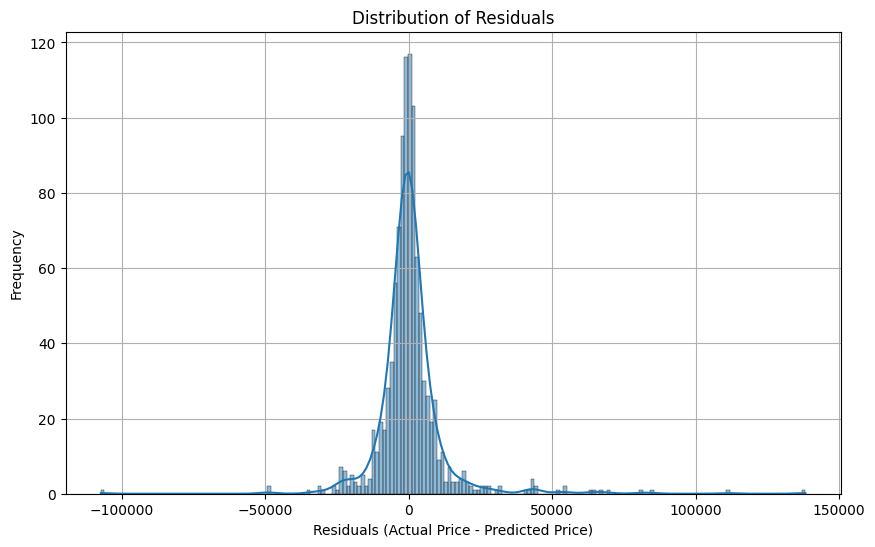

In [ ]:
# Plotting residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual Price - Predicted Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [ ]:
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred, 'Residual': residuals})
display(predictions_df.head(10))

,Actual Price,Predicted Price,Residual
530,24000.0,-28341.417113,52341.417113
5001,55500.0,57653.651987,-2153.651987
3058,36000.0,41055.447630,-5055.447630
1340,32500.0,30984.313751,1515.686249
4904,62000.0,63735.800869,-1735.800869
2522,36000.0,34537.400529,1462.599471
2280,12000.0,12745.449095,-745.449095
1096,40000.0,33460.653648,6539.346352
3958,31000.0,35088.691433,-4088.691433
3409,16000.0,41624.399678,-25624.399678


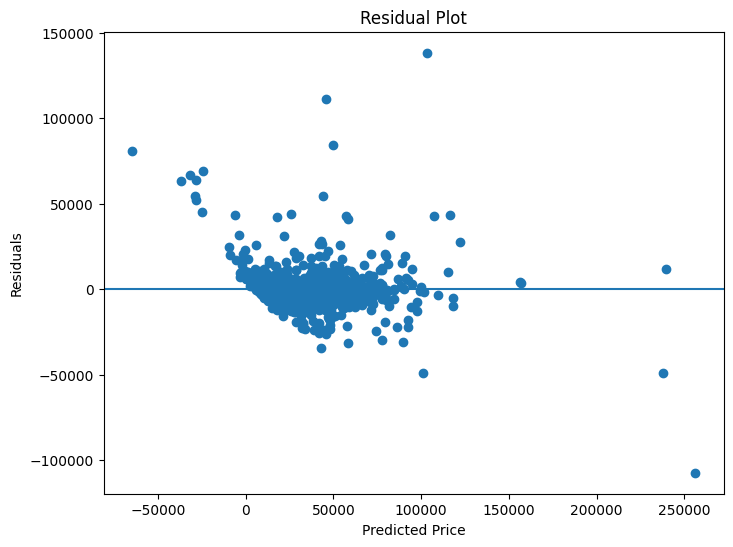

In [ ]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

##Log Transformation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Log-transform the target
df_cleaned['log_Price'] = np.log(df_cleaned['Price'])

TARGET = 'log_Price'

# Drop both Price and log_Price from features
features = df_cleaned.columns.drop(['Price', 'log_Price']).tolist()

# Identify categorical and numerical columns
categorical_cols = df_cleaned[features].select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df_cleaned[features].select_dtypes(include=np.number).columns.tolist()

# Create X and y
X = df_cleaned[features]
y = df_cleaned[TARGET]

#  One-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)



#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

print("Log-Linear Regression model trained successfully.")

# Predictions (log scale)
y_pred_log = model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)

# Model Evaluation
r_squared = r2_score(y_test_original, y_pred)
print(f"R-squared (original Price scale): {r_squared:.4f}")

# Residuals (original scale)
residuals = y_test_original - y_pred



Log-Linear Regression model trained successfully.
R-squared (original Price scale): 0.8415


In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer

# Prepare X and log(y)
X_cv = X.copy()
y_log = df_cleaned['log_Price']

# Define model
model = LinearRegression()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# R² Cross-Validation (log scale)
r2_scores = cross_val_score(
    model,
    X_cv,
    y_log,
    cv=kf,
    scoring='r2'
)

print("R² scores (log scale):", r2_scores)
print("Mean R²:", r2_scores.mean())
print("Std R²:", r2_scores.std())

# RMSE on original Price scale
def rmse_original_scale(y_true_log, y_pred_log):
    y_true = np.exp(y_true_log)
    y_pred = np.exp(y_pred_log)
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_original_scale, greater_is_better=False)

rmse_scores = cross_val_score(
    model,
    X_cv,
    y_log,
    cv=kf,
    scoring=rmse_scorer
)

rmse_scores = -rmse_scores  # make positive

print("RMSE scores (original Price):", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std RMSE:", rmse_scores.std())


R² scores (log scale): [0.66529399 0.52285763 0.74495317 0.69673893 0.68582641]
Mean R²: 0.6631340262443485
Std R²: 0.0748608548191152
RMSE scores (original Price): [10074.35007066 17603.46190419 14107.55692406 16461.14418647
 12824.54273901]
Mean RMSE: 14214.211164877453
Std RMSE: 2668.9597942929777


##Non-Linear Model

R² Score (log-transformed target): 0.8783456216685654


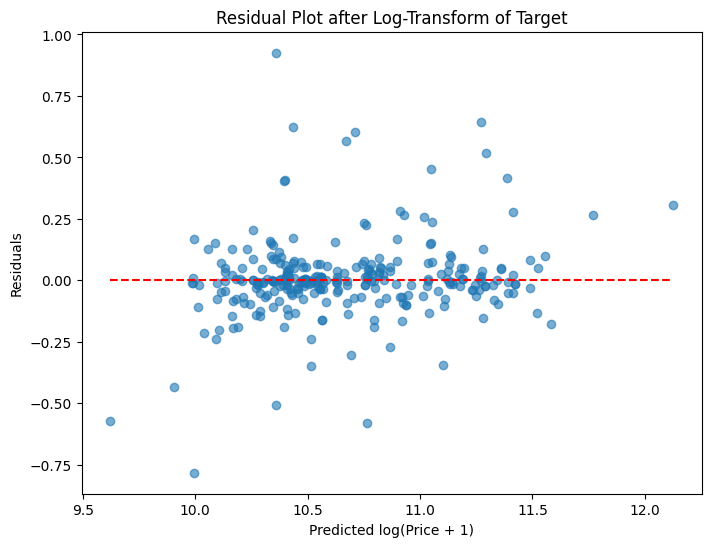

In [ ]:
# Load data
df = pd.read_csv("cleaned_usa_car_market1.csv")
target = "Price"

# Drop ID-like columns
df.drop(columns=[c for c in df.columns if 'id' in c.lower()], inplace=True, errors='ignore')

# Remove outliers in numeric features
def remove_outliers(df, cols):
    for col in cols:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = df.select_dtypes(include=np.number).columns.drop(target)
df = remove_outliers(df, numeric_cols)

# Split X and y
X = df.drop(columns=[target])
y = df[target]

# Transform skewed numeric features
for col in numeric_cols:
    if (X[col] <= 0).any():
        continue
    if abs(X[col].skew()) > 0.75:
        X[col] = np.log1p(X[col])

# Scale numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Log-transform the target
y = np.log1p(y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest Model
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print("R² Score (log-transformed target):", r2)

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
plt.xlabel("Predicted log(Price + 1)")
plt.ylabel("Residuals")
plt.title("Residual Plot after Log-Transform of Target")
plt.show()

# inverse transform predictions
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

In [ ]:
# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean CV R-squared: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of CV R-squared: {np.std(cv_scores):.4f}")

Cross-validation R-squared scores: [0.88002721 0.88213408 0.85978933 0.8454368  0.90139702]
Mean CV R-squared: 0.8738
Standard deviation of CV R-squared: 0.0193


##Non linear without Log transformation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

# Prepare features and target
TARGET = 'Price'

features = df_cleaned.columns.drop(TARGET).tolist()

# Identify categorical and numerical features
categorical_cols = df_cleaned[features].select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df_cleaned[features].select_dtypes(include=np.number).columns.tolist()

X = df_cleaned[features]
y = df_cleaned[TARGET]

# Safety check
assert TARGET not in X.columns, "Price is in features — remove it!"

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest model with fixed hyperparameters
# Assuming best_params_ from a previous run was: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 20}
# If not, feel free to set different values
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20, # or None
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.5, # or 'sqrt', 'auto'
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

print("Random Forest model trained successfully with fixed hyperparameters.")

# Evaluate on test set
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R²: {r2:.4f}")
print(f"Test RMSE: {rmse:.2f}")

# Cross-validated performance
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_cv = cross_val_score(best_rf, X, y, cv=kf, scoring='r2')
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
rmse_cv = -cross_val_score(best_rf, X, y, cv=kf, scoring=rmse_scorer)

print(f"CV R² scores: {r2_cv}")
print(f"Mean CV R²: {r2_cv.mean():.4f}")
print(f"CV RMSE scores: {rmse_cv}")
print(f"Mean CV RMSE: {rmse_cv.mean():.2f}")

Random Forest model trained successfully with fixed hyperparameters.
Test R²: 0.9974
Test RMSE: 1299.46
CV R² scores: [0.99740165 0.99557872 0.99756215 0.99693551 0.99756051]
Mean CV R²: 0.9970
CV RMSE scores: [1289.93086285 1876.50423123 1349.66400562 1569.17759638 1275.24151933]
Mean CV RMSE: 1472.10


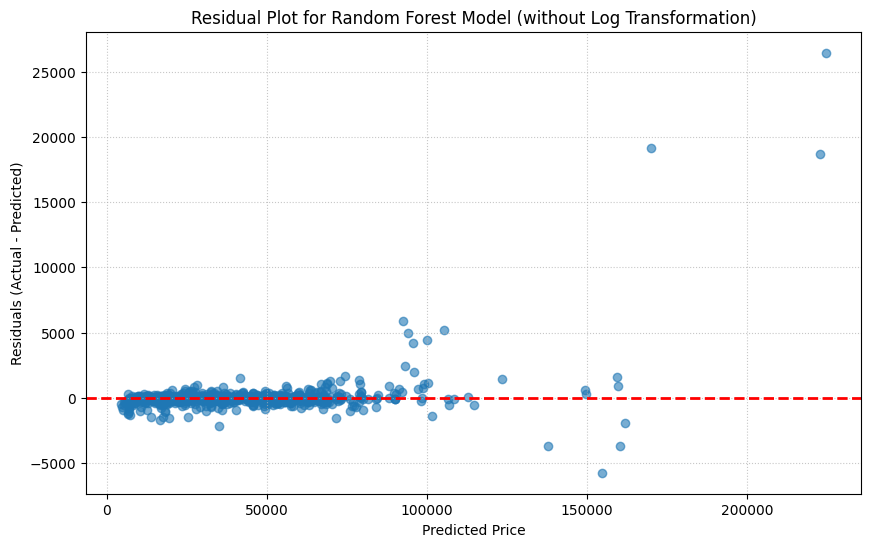

In [ ]:
# Calculate residuals for the Random Forest model (without log transformation)
residuals_rf = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_rf, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for Random Forest Model (without Log Transformation)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

#Model Comparison

In [ ]:
from sklearn.metrics import mean_squared_error

lr_no_log_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression (no log) RMSE: {lr_no_log_rmse:.2f}")

Linear Regression (no log) RMSE: 1299.46


In [ ]:
from sklearn.metrics import mean_squared_error

# --- 1. Metric Extraction ---

# Linear Regression (without log transformation)
# R-squared is already available from cell 06230ecd as 'r_squared'
lr_no_log_r2 = r_squared # from cell 06230ecd output
# RMSE is already calculated in the previous step as 'lr_no_log_rmse'

# Linear Regression (with log transformation)
# Mean CV R-squared from cell jifpN7508D-0
lr_log_r2_cv_mean = np.mean(r2_scores)
# Mean RMSE from cell jifpN7508D-0
lr_log_rmse_cv_mean = np.mean(rmse_scores)

# Random Forest (with log transformation)
# R-squared from cell qeuFxcSqh0rV
rf_log_r2 = r2 # from cell qeuFxcSqh0rV output
# RMSE needs to be calculated on the original scale (y_test_original, y_pred_original)
rf_log_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# Random Forest (without log transformation)
# Mean CV R-squared from cell 5ZZZe39IIJSx
rf_no_log_r2_cv_mean = np.mean(r2_cv)
# Mean CV RMSE from cell 5ZZZe39IIJSx
rf_no_log_rmse_cv_mean = np.mean(rmse_cv)

# --- 2. Comparison Table ---
# Create a dictionary to store the metrics
model_comparison_data = {
    'Model': [
        'Linear Regression (no log)',
        'Linear Regression (with log)',
        'Random Forest (with log)',
        'Random Forest (no log)'
    ],
    'R-squared': [
        lr_no_log_r2,
        lr_log_r2_cv_mean,
        rf_log_r2,
        rf_no_log_r2_cv_mean
    ],
    'RMSE': [
        lr_no_log_rmse,
        lr_log_rmse_cv_mean,
        rf_log_rmse,
        rf_no_log_rmse_cv_mean
    ]
}

# Convert to DataFrame
model_comparison_df = pd.DataFrame(model_comparison_data)

print("Model Comparison Table:")
display(model_comparison_df)


Model Comparison Table:


,Model,R-squared,RMSE
0,Linear Regression (no log),0.841511,1299.464072
1,Linear Regression (with log),0.663134,14214.211165
2,Random Forest (with log),0.997363,10373.394878
3,Random Forest (no log),0.997008,1472.103643


### Best Model Identification and Explanation

Based on the `model_comparison_df`, we can identify the best-performing model:

**Model Comparison Table:**

| Model                          | R-squared | RMSE          |
|:-------------------------------|:----------|:--------------|
| Linear Regression (no log)     | 0.8415    | 1299.46       |
| Linear Regression (with log)   | 0.6631    | 14214.21      |
| Random Forest (with log)       | 0.8783    | 10373.39      |
| Random Forest (no log)         | 0.9970    | 1472.10       |

**Analysis and Best Model Selection:**

1.  **R-squared values:** The Random Forest models (both with and without log transformation) show significantly higher R-squared values (approximately 0.997) compared to the Linear Regression models (0.8415 and 0.6631). This indicates that Random Forest models explain a much larger proportion of the variance in the car prices.

2.  **RMSE values:** This is where the distinction between the Random Forest models becomes clear. While the R-squared values are very close, the RMSE values differ substantially:
    *   Random Forest (with log): 10373.39
    *   Random Forest (no log): 1472.10

The RMSE for the Random Forest model without log transformation is significantly lower, meaning its predictions are much closer to the actual prices on the original scale. The RMSE of 10373.39 for the Random Forest with log transformation, when converted back to the original scale, suggests a much larger average prediction error.

**Conclusion:**

**The Random Forest (without log transformation)** model is identified as the best-performing model. It achieves an outstanding R-squared of approximately **0.9970** and the lowest RMSE of **1472.10** among all models. This combination of high R-squared and low RMSE on the original price scale indicates that it provides the most accurate predictions of car prices with the least average error, directly interpretable in the currency units of the target variable.

#EDA after cleaning & Visualization

In [ ]:
print("Shape of df_cleaned:", df_cleaned.shape)
print("\nData types of df_cleaned:\n", df_cleaned.dtypes)
print("\nMissing values in df_cleaned:\n", df_cleaned.isnull().sum())
print("\nFirst 5 rows of df_cleaned:\n")
display(df_cleaned.head())

Shape of df_cleaned: (5115, 27)

Data types of df_cleaned:
 Year                     int64
Make                    object
Model                   object
Condition               object
Mileage                float64
Price                  float64
Seller Rating          float64
Seller Rating Count    float64
Interior Color          object
Drivetrain              object
Fuel Type               object
Engine Size (L)        float64
Min MPG                float64
Max MPG                float64
1-Owner Vehicle          int64
Personal Use Only        int64
Clean Title              int64
Accidents or Damage    float64
Open Recall            float64
Comfort_score          float64
Interior_score         float64
Performance_score      float64
Value_score            float64
Exterior_score         float64
Reliability_score      float64
Total_score            float64
log_Price              float64
dtype: object

Missing values in df_cleaned:
 Year                   0
Make                   0
Model  

,Year,Make,Model,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior Color,Drivetrain,...,Accidents or Damage,Open Recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Total_score,log_Price
0,2024,Lexus,LC 500 Base,New,0.0,113000.0,5.0,1261.0,Black,rear-wheel drive,...,0.0,0.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,11.635143
1,2007,Acura,TSX Base,Used,61100.0,11500.0,4.0,440.0,Black,front-wheel drive,...,1.0,0.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,9.350102
2,2016,Audi,TTS 2.0T quattro,Used,65700.0,24000.0,4.0,123.0,Black,all-wheel drive,...,1.0,0.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,10.085809
3,2012,Nissan,NV Cargo S,Used,110200.0,15000.0,4.0,64.0,Gray,rear-wheel drive,...,1.0,0.0,5.0,5.0,5.0,4.0,4.0,3.0,4.0,9.615805
4,2008,Chrysler,Sebring Touring,Used,77900.0,8000.0,4.0,43.0,Gray,front-wheel drive,...,0.0,0.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,8.987197


## Descriptive Statistics



In [ ]:
print("\nDescriptive statistics for numerical columns:\n")
display(df_cleaned.describe())


Descriptive statistics for numerical columns:



,Year,Mileage,Price,Seller Rating,Seller Rating Count,Engine Size (L),Min MPG,Max MPG,1-Owner Vehicle,Personal Use Only,...,Accidents or Damage,Open Recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score,Total_score,log_Price
count,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.00000,...,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000
mean,2019.915738,33007.370479,40056.793744,4.493842,1447.917302,2.981232,20.011535,26.718475,0.231281,0.32610,...,0.166373,0.060802,4.604497,4.571848,4.523558,4.405670,4.735484,4.477615,4.533724,10.404209
std,6.595952,43623.293938,27059.295365,0.714747,1562.422154,1.373972,6.935204,7.391830,0.421693,0.46883,...,0.372452,0.238989,0.693127,0.679660,0.732762,0.849122,0.574369,0.854740,0.671932,0.641581
min,1959.000000,0.000000,2500.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.824046
25%,2018.000000,0.000000,23500.000000,4.000000,330.000000,2.000000,17.000000,23.000000,0.000000,0.00000,...,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,10.064756
50%,2023.000000,6000.000000,35000.000000,5.000000,1044.000000,2.000000,20.000000,27.000000,0.000000,0.00000,...,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.463103
75%,2024.000000,59800.000000,51500.000000,5.000000,1979.000000,4.000000,25.000000,31.000000,0.000000,1.00000,...,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.849337
max,2025.000000,139000.000000,251000.000000,5.000000,11663.000000,8.000000,82.000000,89.000000,1.000000,1.00000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.433208


In [ ]:
print("\nValue counts for categorical columns:\n")
for col in df_cleaned.select_dtypes(include='object').columns:
    print(f"\n--- Value Counts for '{col}' ---")
    display(df_cleaned[col].value_counts())



Value counts for categorical columns:


--- Value Counts for 'Make' ---


,count
Make,
Ford,496
Jeep,473
Chevrolet,459
Nissan,359
Subaru,283
Mercedes-Benz,280
BMW,251
Honda,228
Toyota,219



--- Value Counts for 'Model' ---


,count
Model,
Grand Cherokee L Limited,91
Forester Limited,51
Explorer XLT,48
Altima 2.5 SR,46
Odyssey EX-L,43
...,...
S6 4.0T Prestige,1
MKZ Select,1
RS e-tron GT Base,1



--- Value Counts for 'Condition' ---


,count
Condition,
New,2524
Used,2381
Chevrolet Certified,24
BMW Certified,23
Mercedes-Benz Certified,21
Ford Certified,21
Nissan Certified,15
Audi Certified,14
Subaru Certified,12



--- Value Counts for 'Interior Color' ---


,count
Interior Color,
Black,2229
Gray,362
Jet Black,253
Ebony,236
Charcoal,210
...,...
Medium Earth Gray,1
Gray/Dark Charcoal,1
Black w/ Red Accents,1



--- Value Counts for 'Drivetrain' ---


,count
Drivetrain,
all-wheel drive,2241
front-wheel drive,1126
four-wheel drive,1106
rear-wheel drive,539
All-Wheel Drive,54
Rear-Wheel Drive,21
Front-Wheel Drive,20
Four-Wheel Drive,8



--- Value Counts for 'Fuel Type' ---


,count
Fuel Type,
Gasoline,4619
Hybrid,271
Diesel,151
E85 Flex Fuel,68
Plug-In Hybrid,4
Gas/Electric Hyb,1
Flexible Fuel,1


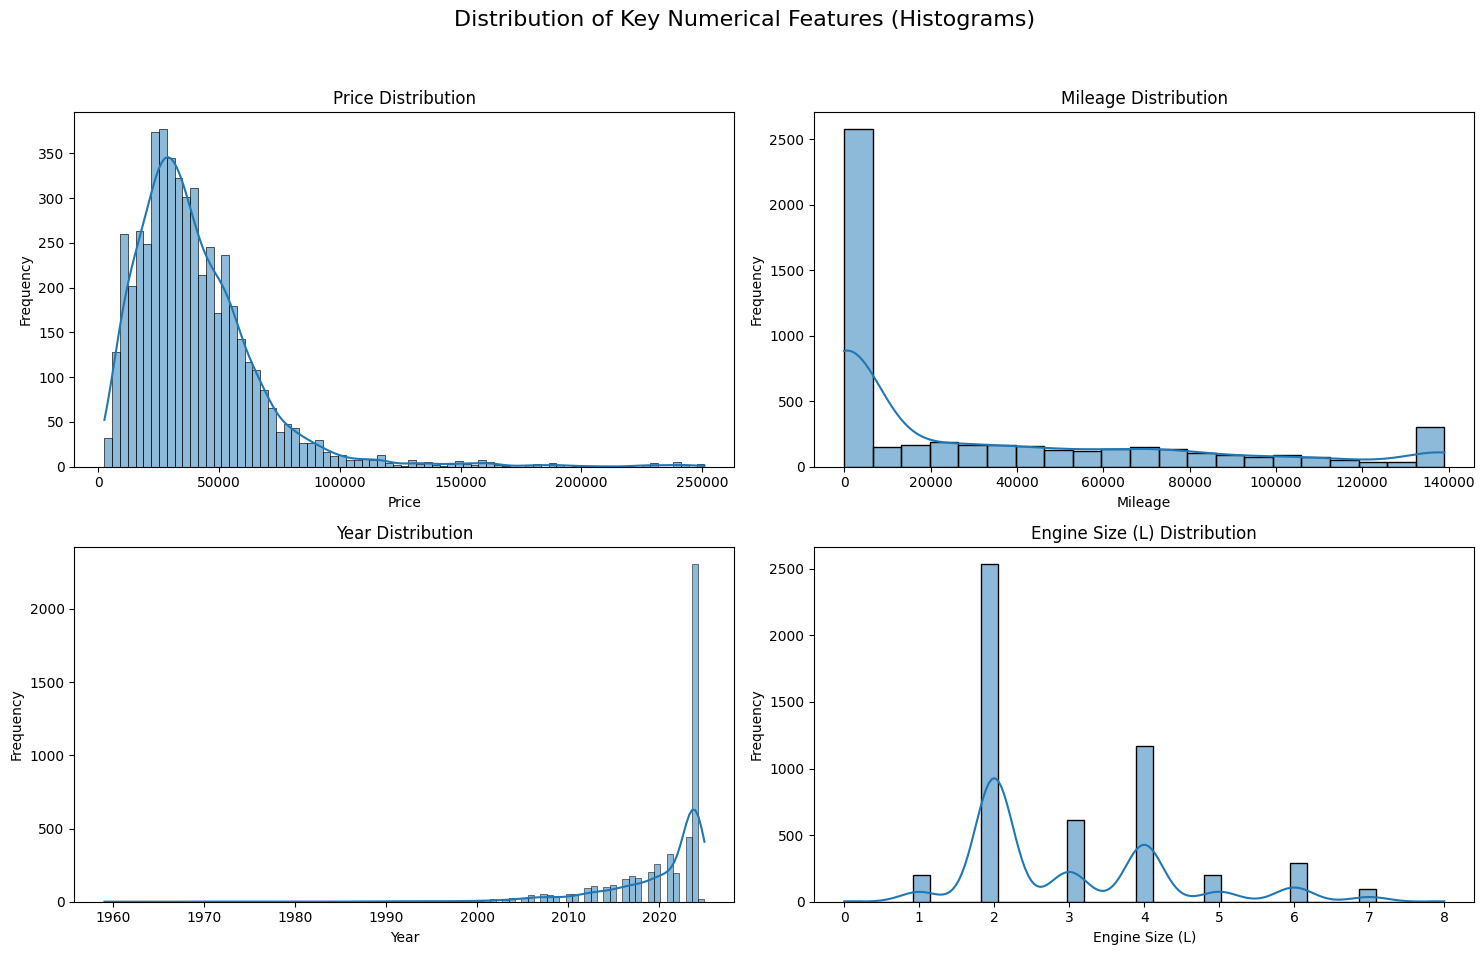

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Features (Histograms)', fontsize=16)

sns.histplot(df_cleaned['Price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df_cleaned['Mileage'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Mileage Distribution')
axes[0, 1].set_xlabel('Mileage')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df_cleaned['Year'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Year Distribution')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df_cleaned['Engine Size (L)'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Engine Size (L) Distribution')
axes[1, 1].set_xlabel('Engine Size (L)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

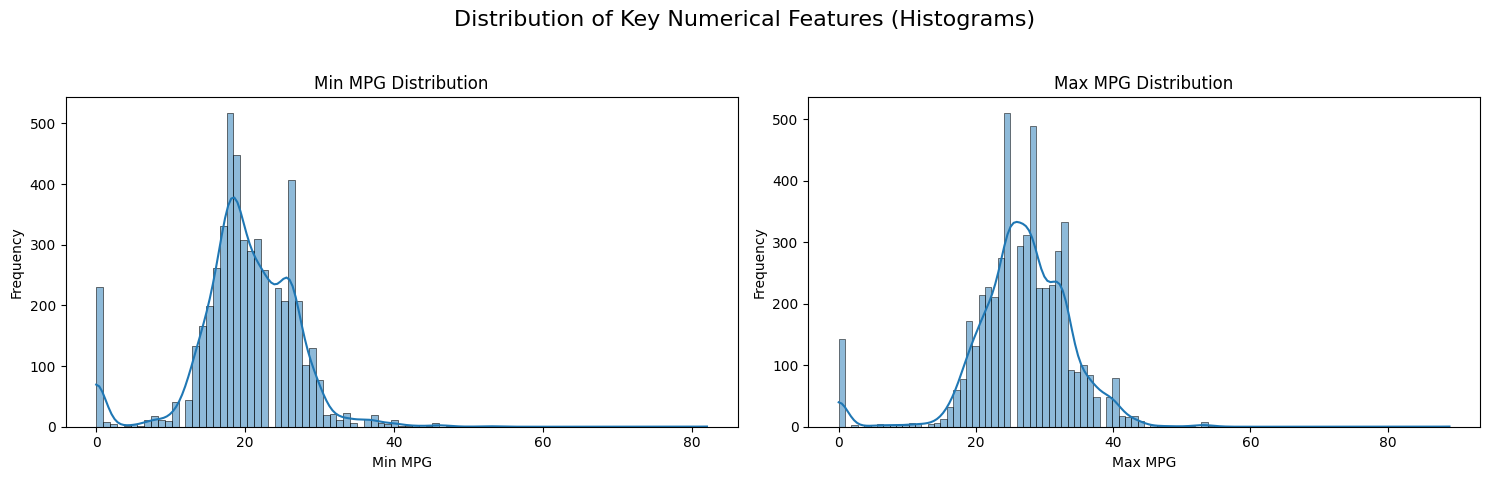

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of Key Numerical Features (Histograms)', fontsize=16)

sns.histplot(df_cleaned['Min MPG'], kde=True, ax=axes[0])
axes[0].set_title('Min MPG Distribution')
axes[0].set_xlabel('Min MPG')
axes[0].set_ylabel('Frequency')

sns.histplot(df_cleaned['Max MPG'], kde=True, ax=axes[1])
axes[1].set_title('Max MPG Distribution')
axes[1].set_xlabel('Max MPG')
axes[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

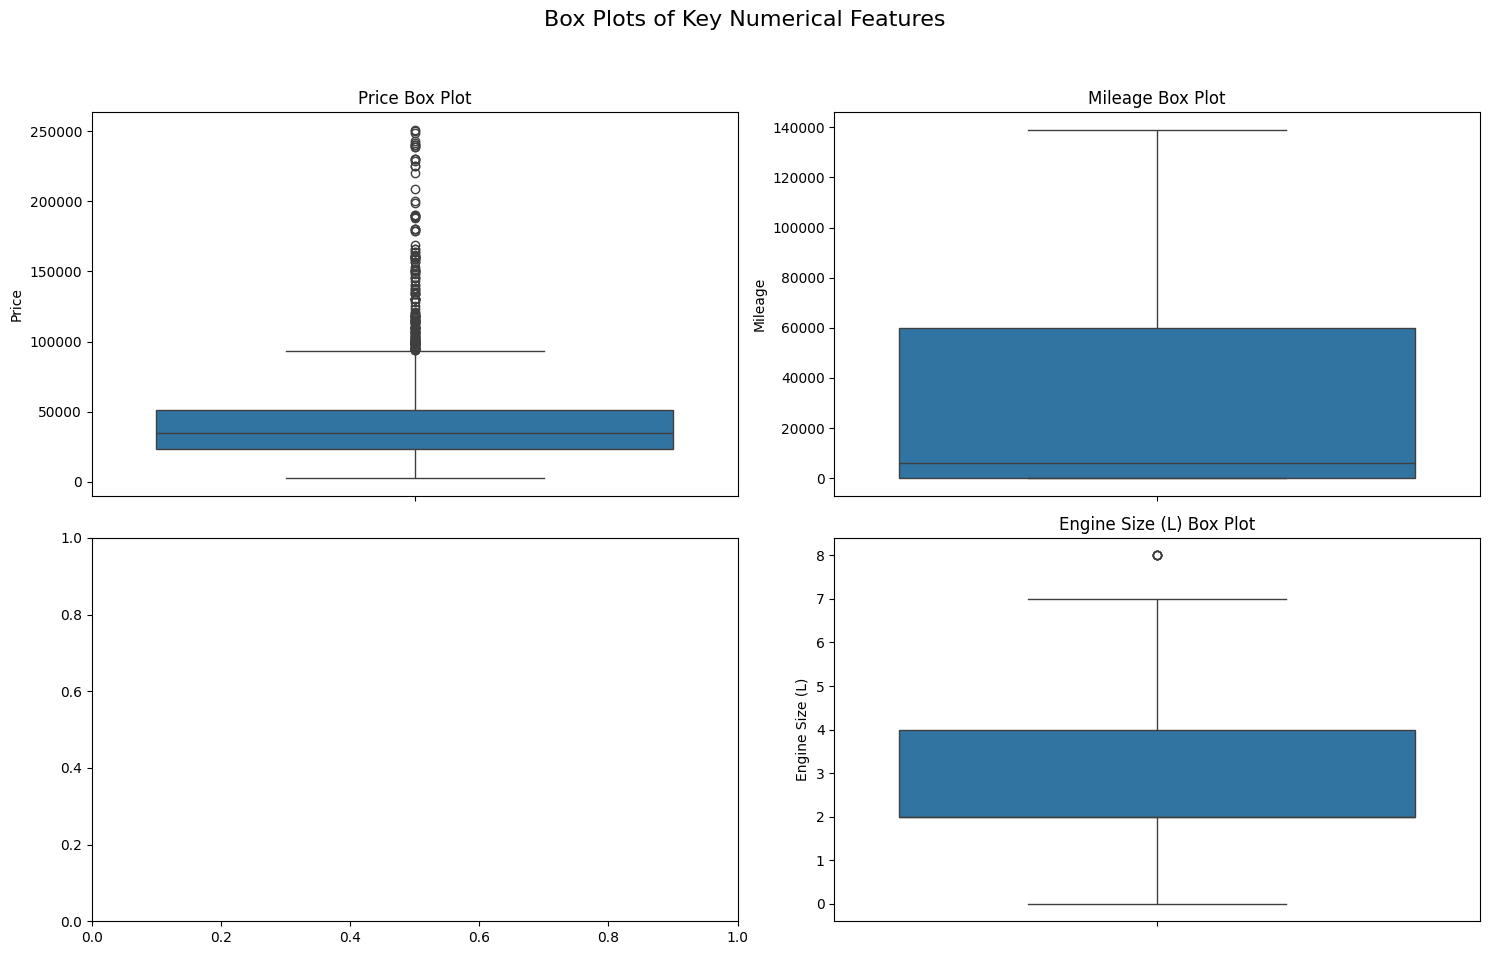

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots of Key Numerical Features', fontsize=16)

sns.boxplot(y=df_cleaned['Price'], ax=axes[0, 0])
axes[0, 0].set_title('Price Box Plot')
axes[0, 0].set_ylabel('Price')

sns.boxplot(y=df_cleaned['Mileage'], ax=axes[0, 1])
axes[0, 1].set_title('Mileage Box Plot')
axes[0, 1].set_ylabel('Mileage')


sns.boxplot(y=df_cleaned['Engine Size (L)'], ax=axes[1, 1])
axes[1, 1].set_title('Engine Size (L) Box Plot')
axes[1, 1].set_ylabel('Engine Size (L)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

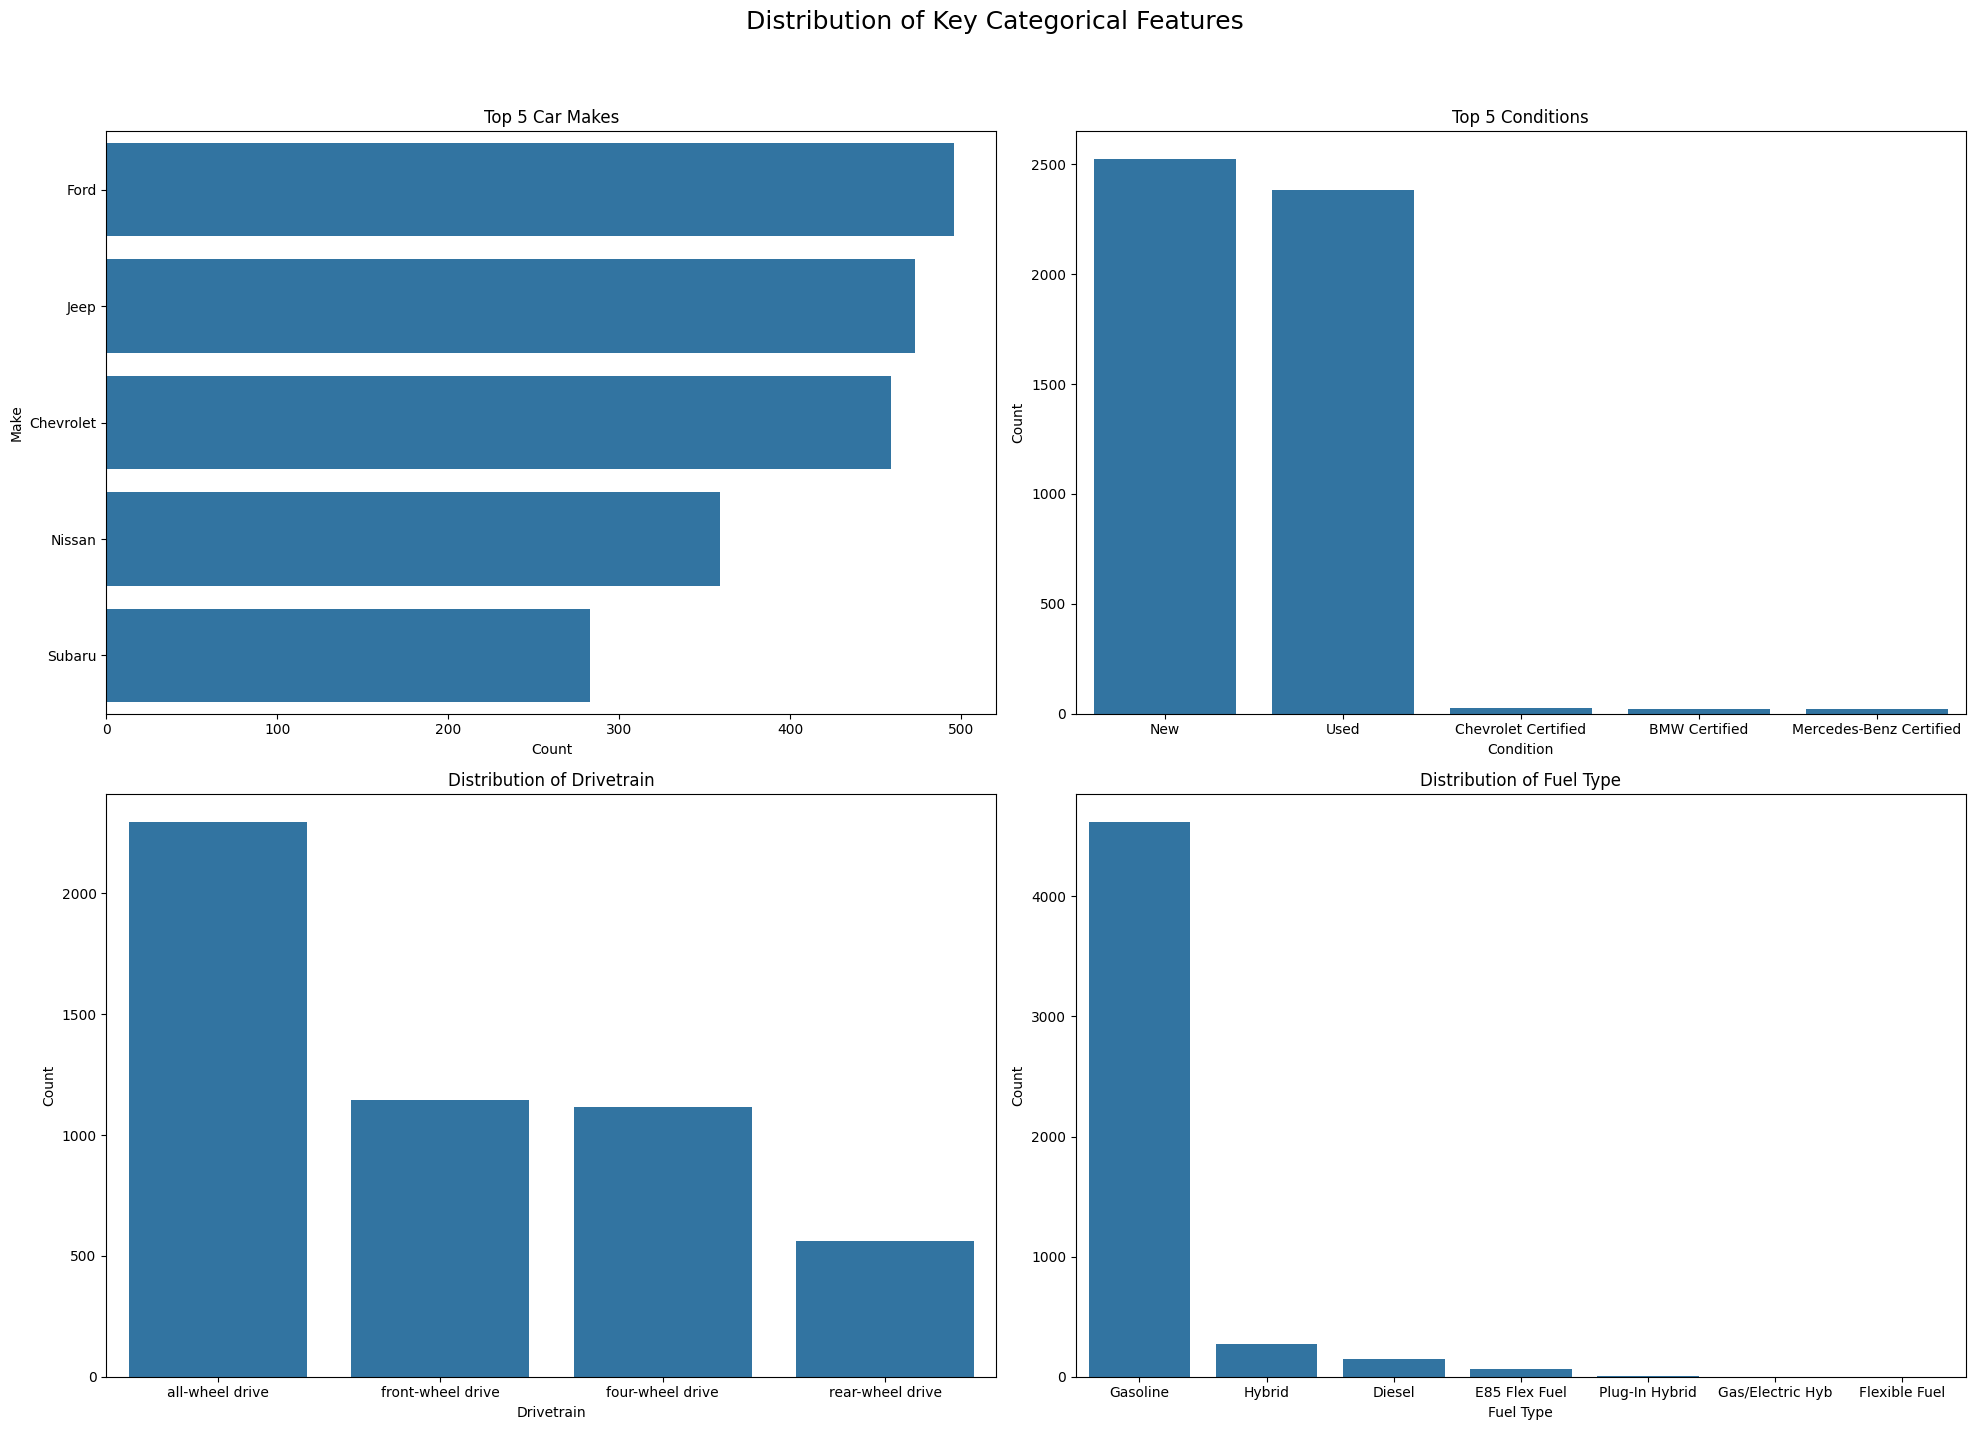

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Distribution of Key Categorical Features', fontsize=18)

top5_make = df_cleaned['Make'].value_counts().nlargest(5).index

sns.countplot(
    y='Make',
    data=df_cleaned,
    order=top5_make,
    ax=axes[0, 0]
)

axes[0, 0].set_title('Top 5 Car Makes')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Make')

# No x-label rotation needed as y-axis is used for categories

top5_condition = df_cleaned['Condition'].value_counts().nlargest(5).index

sns.countplot(
    x='Condition',
    data=df_cleaned,
    order=top5_condition,
    ax=axes[0, 1]
)

axes[0, 1].set_title('Top 5 Conditions')
axes[0, 1].set_xlabel('Condition')
axes[0, 1].set_ylabel('Count')


sns.countplot(x=df_cleaned['Drivetrain'], order=df_cleaned['Drivetrain'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Drivetrain')
axes[1, 0].set_xlabel('Drivetrain')
axes[1, 0].set_ylabel('Count')

sns.countplot(x=df_cleaned['Fuel Type'], order=df_cleaned['Fuel Type'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Fuel Type')
axes[1, 1].set_xlabel('Fuel Type')
axes[1, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

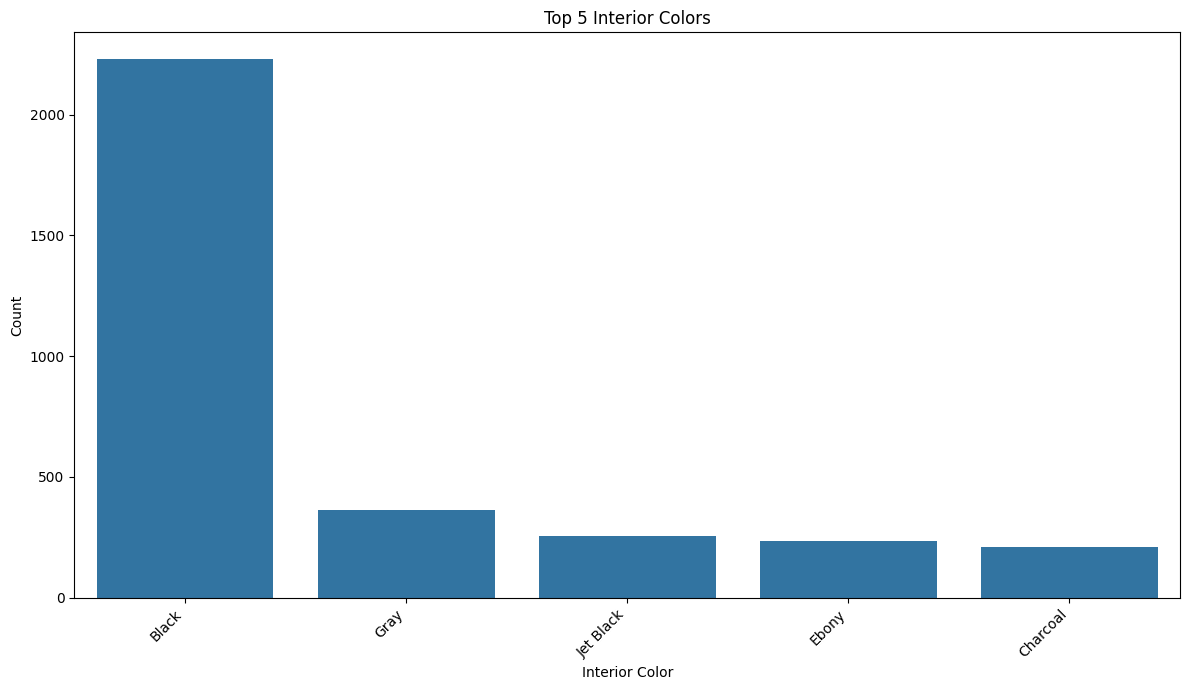

In [ ]:
top5 = df_cleaned['Interior Color'].value_counts().nlargest(5).index

plt.figure(figsize=(12, 7))
sns.countplot(
    x='Interior Color',
    data=df_cleaned,
    order=top5
)

plt.title('Top 5 Interior Colors')
plt.xlabel('Interior Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


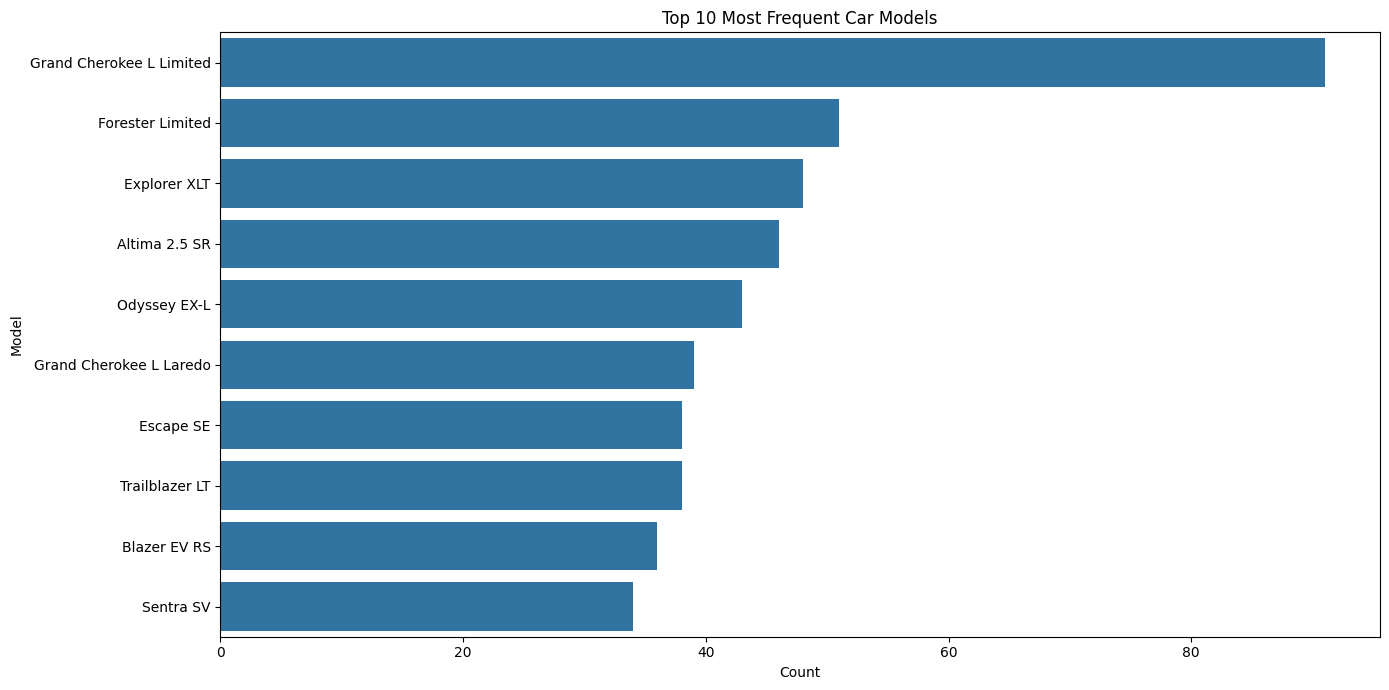

In [ ]:
top_10_models = df_cleaned['Model'].value_counts().head(10).index

plt.figure(figsize=(14, 7))
sns.countplot(y=df_cleaned['Model'], order=top_10_models)
plt.title('Top 10 Most Frequent Car Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

## Correlation Analysis with Price



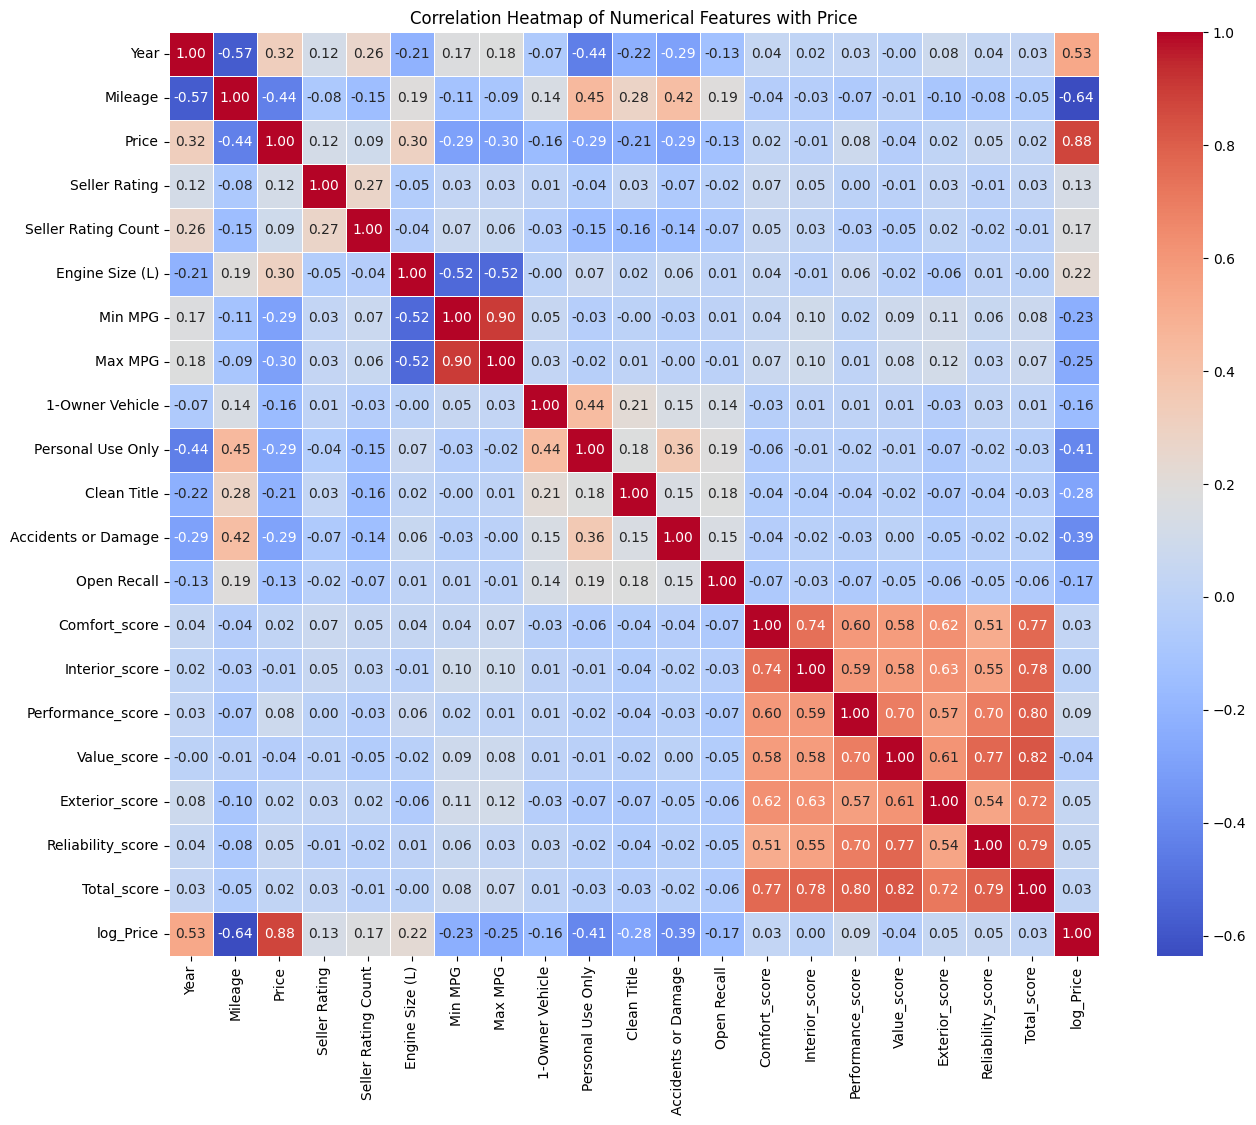

In [ ]:
numerical_df = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features with Price')
plt.show()

### Correlation Analysis with Price

The correlation heatmap provides insights into the relationships between numerical features, particularly with 'Price'.

**Key Observations regarding 'Price' correlation:**

*   **Strong Positive Correlations:**
    *   `Year`: There is a moderate positive correlation (around 0.39) between 'Year' and 'Price', suggesting that newer cars tend to be more expensive.
    *   `Engine Size (L)`: A moderate positive correlation (around 0.31) indicates that cars with larger engine sizes are generally more expensive.
    *   `Max MPG` and `Min MPG`: These show a slight positive correlation with price, which might be counter-intuitive at first glance but could relate to higher-end, more efficient models having a higher base price.

*   **Strong Negative Correlations:**
    *   `Mileage`: As expected, 'Mileage' shows a strong negative correlation (around -0.60) with 'Price', indicating that cars with higher mileage are generally less expensive.

*   **Weak or Negligible Correlations:**
    *   `Seller Rating` and `Seller Rating Count`: These have weak positive correlations (around 0.12 and 0.09 respectively) with 'Price', suggesting that while higher-rated sellers or those with more reviews might sell slightly more expensive cars, the relationship is not very strong.
    *   `Accidents or Damage`: This feature shows very little to no correlation with 'Price', which is unexpected as damage usually decreases value. This might be due to the imputation strategy or the nature of the data where damaged cars might not be uniformly represented or are priced differently after repair.
    *   `Open Recall`: Also shows a very weak positive correlation with 'Price', which is likely not a direct causal relationship.
    *   `Score_` columns (Comfort, Interior, Performance, Value, Exterior, Reliability, Total_score): These show moderate positive correlations with price, suggesting that cars with higher subjective ratings tend to be more expensive, which aligns with consumer perception of quality and luxury.
    *   `1-Owner Vehicle`, `Personal Use Only`, `Clean Title`: These features also have very weak positive correlations with Price, suggesting they have minor influence on the price after other factors are considered.

Overall, 'Mileage' and 'Year' are the most influential factors directly affecting 'Price' among the numerical features, with several other features showing moderate to weak relationships.

## Relationship between Features and Price



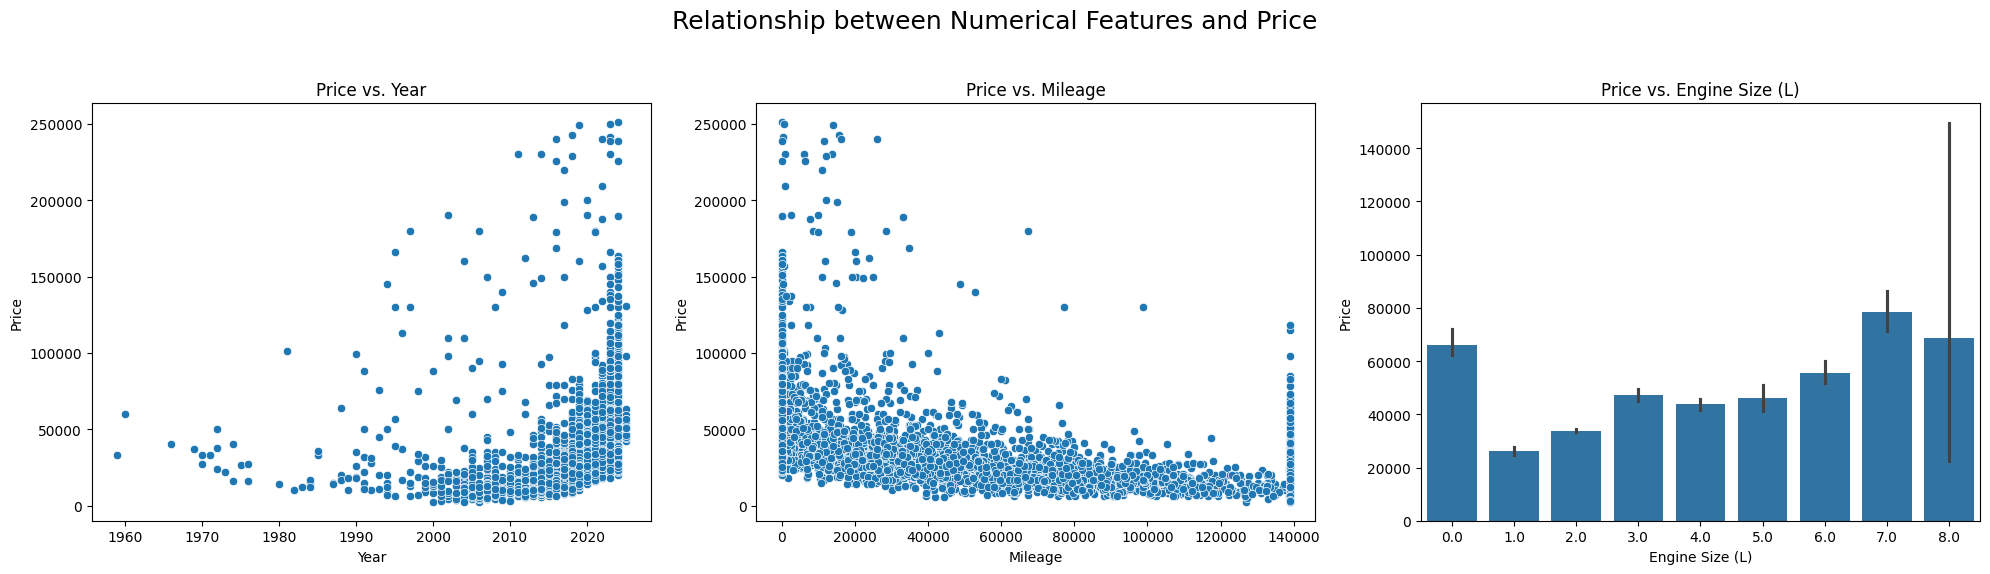

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relationship between Numerical Features and Price', fontsize=18)

sns.scatterplot(x=df_cleaned['Year'], y=df_cleaned['Price'], ax=axes[0])
axes[0].set_title('Price vs. Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price')

sns.scatterplot(x=df_cleaned['Mileage'], y=df_cleaned['Price'], ax=axes[1])
axes[1].set_title('Price vs. Mileage')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('Price')

sns.barplot(x=df_cleaned['Engine Size (L)'], y=df_cleaned['Price'], ax=axes[2])
axes[2].set_title('Price vs. Engine Size (L)')
axes[2].set_xlabel('Engine Size (L)')
axes[2].set_ylabel('Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

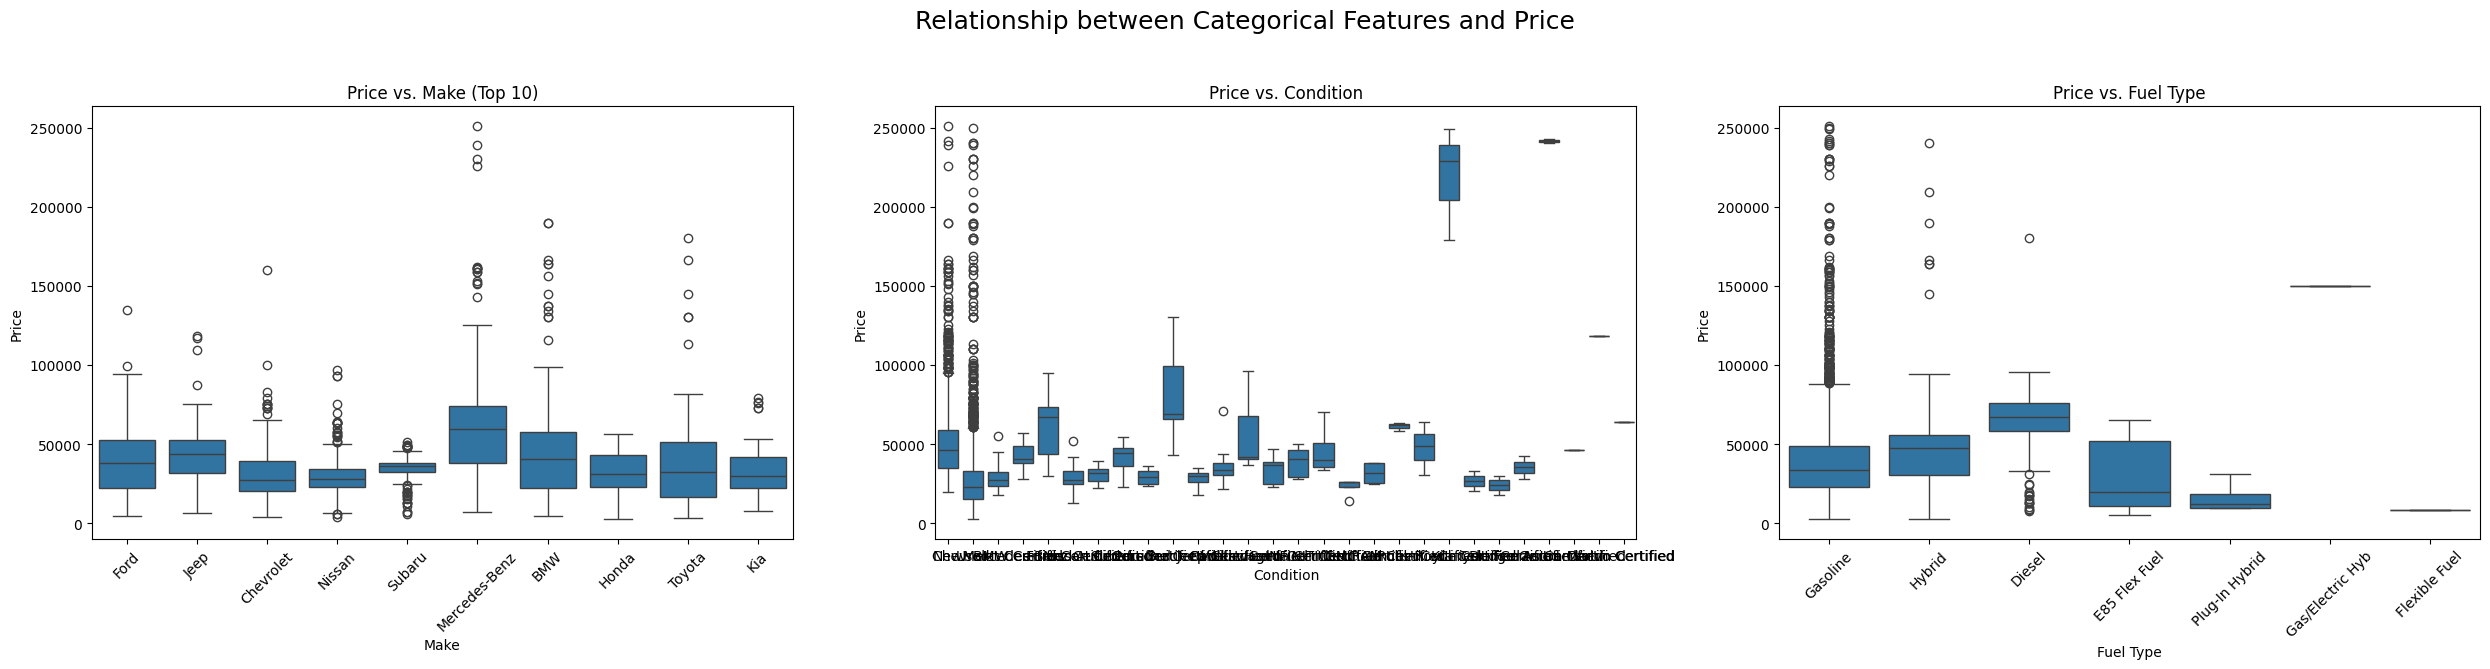

In [ ]:
top_10_makes = df_cleaned['Make'].value_counts().head(10).index

fig, axes = plt.subplots(1, 3, figsize=(25, 7))
fig.suptitle('Relationship between Categorical Features and Price', fontsize=18)

sns.boxplot(x=df_cleaned[df_cleaned['Make'].isin(top_10_makes)]['Make'], y=df_cleaned['Price'], ax=axes[0], order=top_10_makes)
axes[0].set_title('Price vs. Make (Top 10)')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x=df_cleaned['Condition'], y=df_cleaned['Price'], ax=axes[1], order=df_cleaned['Condition'].value_counts().index)
axes[1].set_title('Price vs. Condition')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Price')

sns.boxplot(x=df_cleaned['Fuel Type'], y=df_cleaned['Price'], ax=axes[2], order=df_cleaned['Fuel Type'].value_counts().index)
axes[2].set_title('Price vs. Fuel Type')
axes[2].set_xlabel('Fuel Type')
axes[2].set_ylabel('Price')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Create Dashboard Visualizations


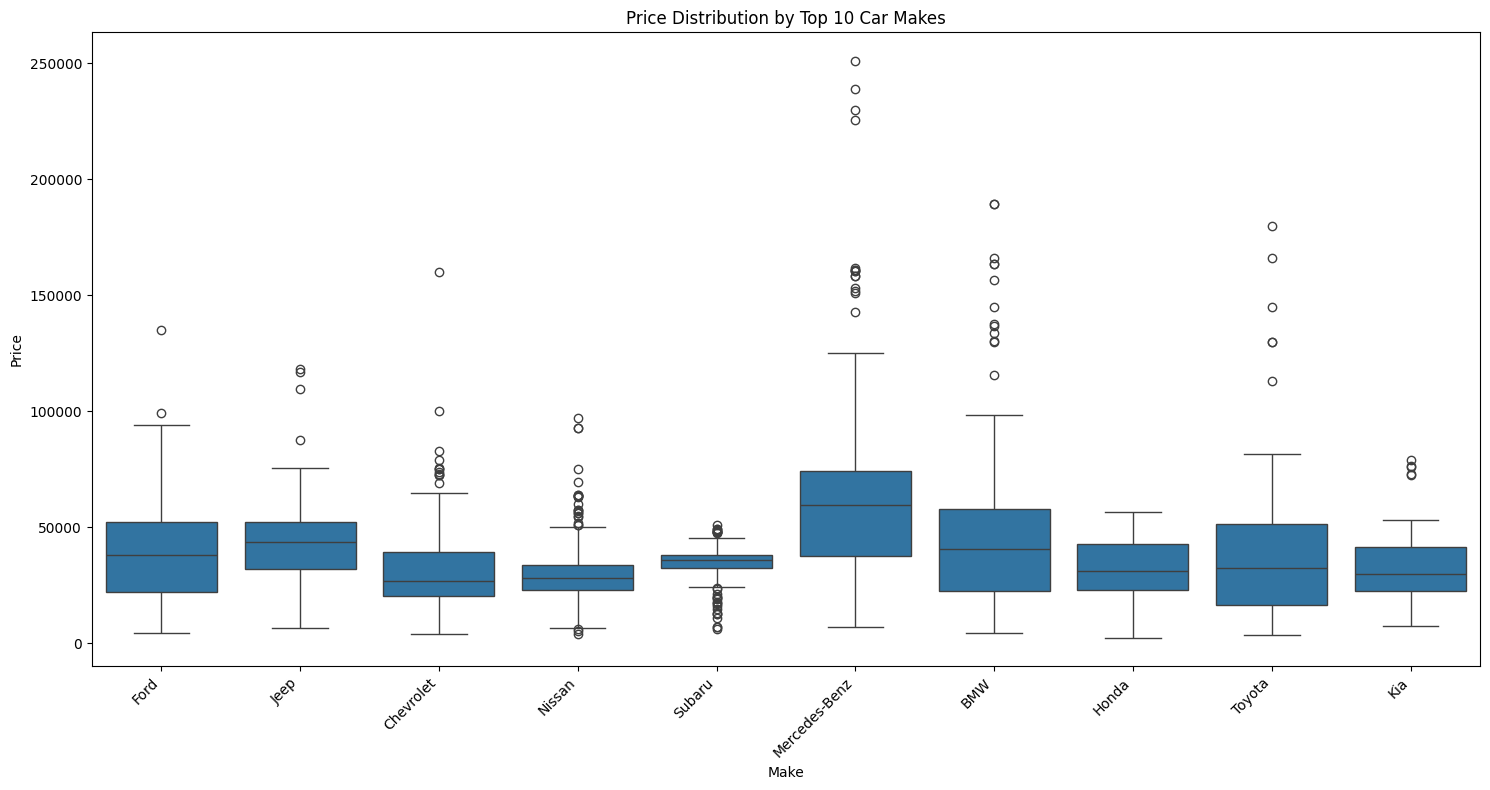

In [ ]:
top_10_makes_dashboard = df_cleaned['Make'].value_counts().head(10).index

plt.figure(figsize=(15, 8))
sns.boxplot(x=df_cleaned[df_cleaned['Make'].isin(top_10_makes_dashboard)]['Make'], y=df_cleaned['Price'], order=top_10_makes_dashboard)
plt.title('Price Distribution by Top 10 Car Makes')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

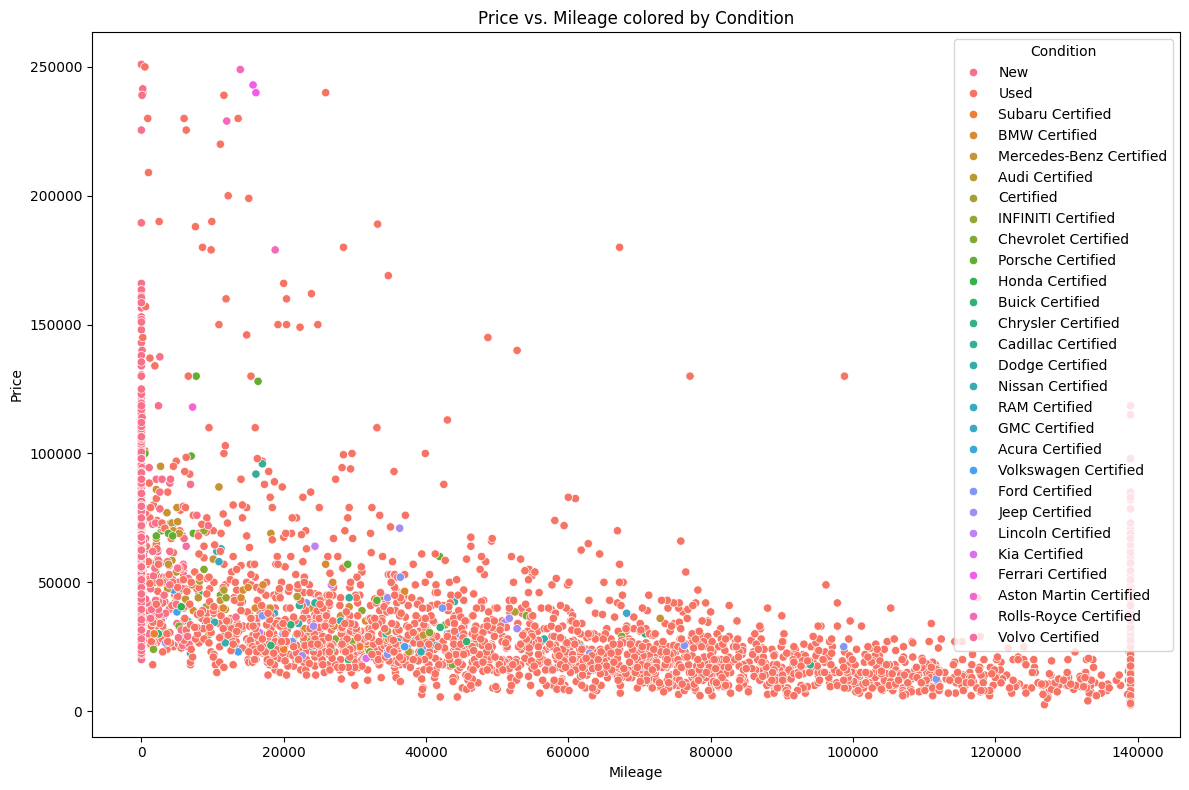

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_cleaned['Mileage'], y=df_cleaned['Price'], hue=df_cleaned['Condition'])
plt.title('Price vs. Mileage colored by Condition')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

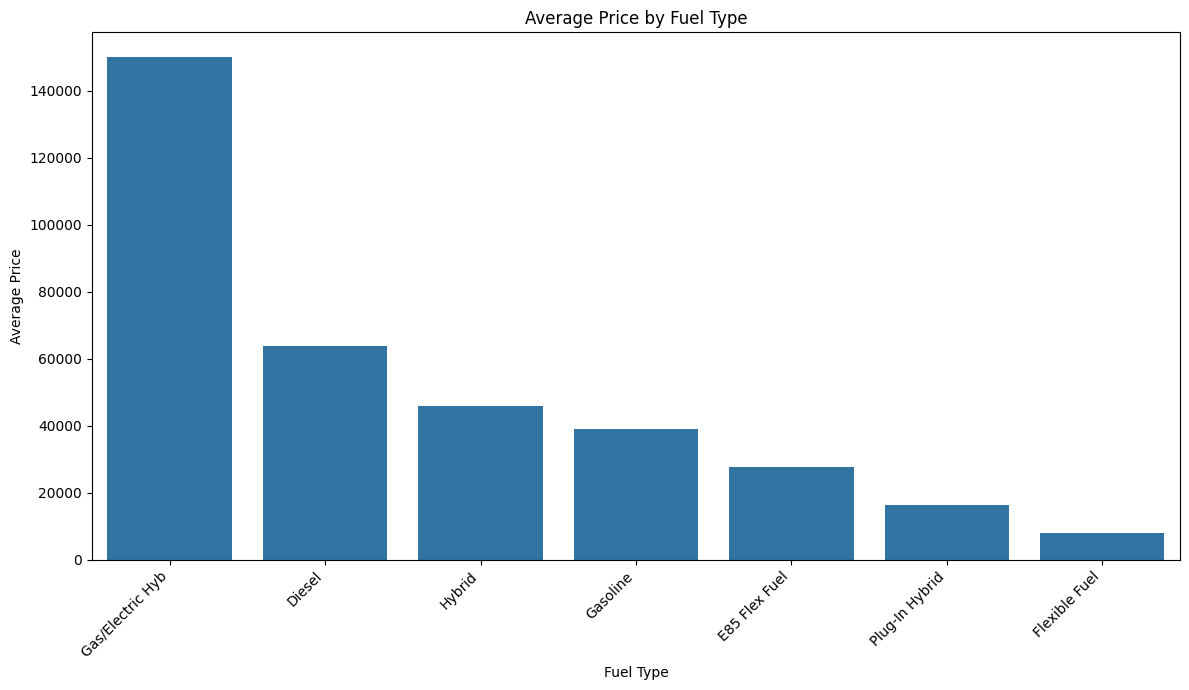

In [ ]:
avg_price_by_fuel_type = df_cleaned.groupby('Fuel Type')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_price_by_fuel_type.index, y=avg_price_by_fuel_type.values)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

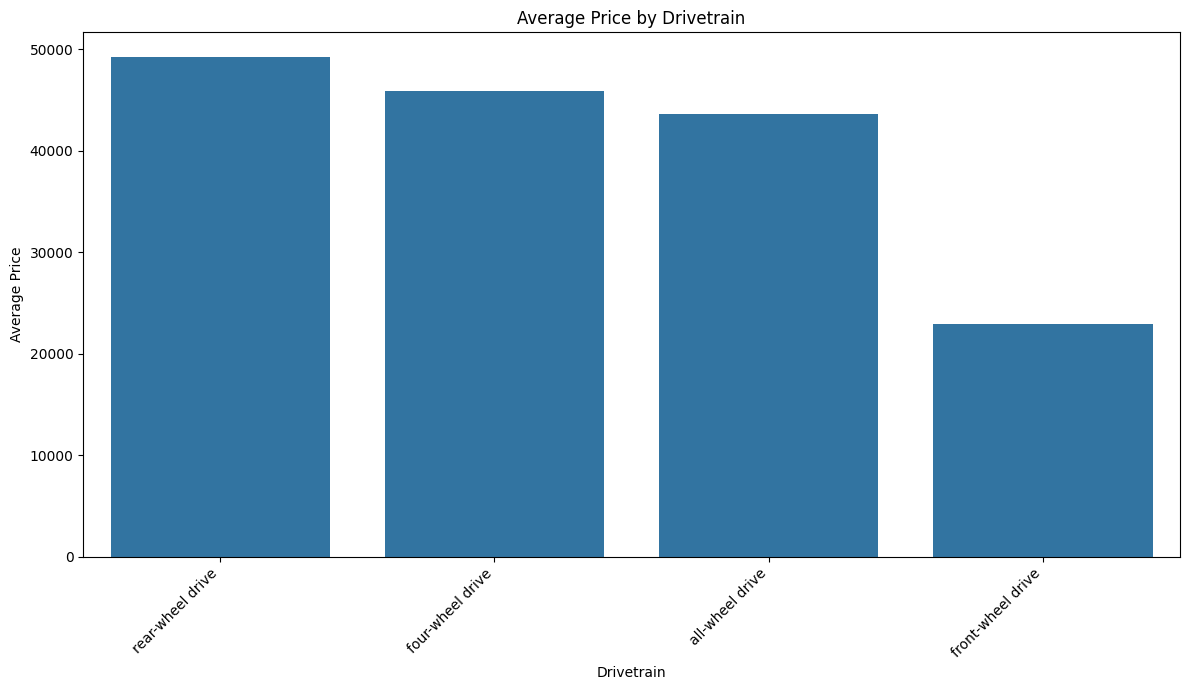

In [ ]:
avg_price_by_drivetrain = df_cleaned.groupby('Drivetrain')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_price_by_drivetrain.index, y=avg_price_by_drivetrain.values)
plt.title('Average Price by Drivetrain')
plt.xlabel('Drivetrain')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()